<a href="https://colab.research.google.com/github/Giwa-ibrahim/Transmission-line-loss-classifier-and-optimization/blob/main/Classification_of_Line_Loss_and_Revenue_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This project focuses on identifying and classifying transmission line losses in a power distribution network, and further proposes a model to optimize revenue generation.

The notebook walks through:
- Data exploration
- Classification of line losses
- Revenue loss estimation and optimization strategies
- Machine learning model building and evaluation



# Table of Contents

1. [Introduction](#introduction)
2. [Install and Import all libraries](#install-and-import-all-libraries)
3. [Load the Dataset](##load-the-dataset)
4. [Data Preprocessing](#data-preprocessing)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
6. [Feature Engineering](#feature-engineering)
    - [Label Encoding](#label-encoding)
    - [Select Features](#select-features)
    - [Prepare Data for training](#prepare-data-for-training)
7. [Model Training & Evaluation](#Model-training-and-evaluation)
   - [LSTM Training](##lstm-training)
   - [LSTM with Attention mechnanism](##lstm-with-attention-mechanism)
   - [BiLSTM Training](##bilstm-training)
   - [GRU Training](##gru-training)
   - [Hyrid Model](##hybrid-model)
      - [LSTM & XGBoost](##lstm-and-xgboost)
      - [LSTM & BiLSTM](##lstm-and-bilstm)
      - [LSTM & GRU](##lstm-and-gru)
8. [Revenue Optimization with PSO](#-Revenue-Optimization)
  - [Plot Actual loss vs Minimized loss](#-plot-data)
  - [Calacualte the Energy saved](#-calcualte-energy-saved)
6. [Deploying with Gradio](#-Model-Evaluation)
7. [Conclusion and Summary](#-Conclusion-and-Summary)


# Install and Import all libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install all libraries

In [ ]:
!pip install tensorflow
!pip install scikeras
!pip install keras-tuner
!pip install pyswarm
!pip install deap
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=80729243038a0d13c2c0cf6846a893e1308e07f0afa1882d65908cdfa2b98d8e
  Stored in directory: /root/.cache/pip/wheels/bb/4f/ec/8970b83323e16aa95034da175454843947376614d6d5e9627f
Successfully built pyswarm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Foun

Import all libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import xgboost as xgb
import kerastuner
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Bidirectional, GRU, Dense, Dropout, BatchNormalization, Multiply, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras.models import Sequential
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import save_model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<ipython-input-3-c58b552c5313>:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


# Load the Dataset

In [ ]:
data= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Datasets/transmission loss dataset/transloss_data.xlsx')
data.head()

,date,africanfoundrieslimited,ikorodu1,ikorodu2,kamsteel,paras,pheonix,quantum,starpipe,sunflag,taopex,topsteel,odogunyan,totalgen,totalload,bilateral,difference
0,2024-07-01 00:00:00,4.07,13.58,102.41,0.000000,18.06,8.99,3.42,2.35,1.76,11.16,0.94,21.2,29.22,21.530000,0.330000,123.680000
1,2024-07-01 01:00:00,3.75,17.41,97.56,0.000000,0.00,8.95,3.16,1.94,1.56,10.13,0.75,20.7,10.13,20.110000,-0.590000,104.990000
2,2024-07-01 02:00:00,3.66,21.43,97.72,2.344870,0.00,10.03,1.88,2.33,1.60,11.32,0.77,20.2,11.32,22.614870,2.414870,107.855130
3,2024-07-01 03:00:00,4.40,5.35,87.78,2.348091,0.00,11.38,1.93,1.92,1.07,11.32,0.60,21.2,11.32,23.648091,2.448091,80.801909
4,2024-07-01 04:00:00,4.33,1.75,97.40,2.351320,0.00,10.57,2.28,2.08,1.27,11.32,0.64,23.7,11.32,23.521320,-0.178680,86.948680


In [ ]:
# Display the shape of the DataFrame
print("Shape of DataFrame:", data.shape)

# Display basic information about the DataFrame
print(data.info())

Shape of DataFrame: (1980, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1980 non-null   object 
 1   africanfoundrieslimited  1980 non-null   float64
 2   ikorodu1                 1980 non-null   float64
 3   ikorodu2                 1980 non-null   float64
 4   kamsteel                 1980 non-null   float64
 5   paras                    1980 non-null   float64
 6   pheonix                  1980 non-null   float64
 7   quantum                  1980 non-null   float64
 8   starpipe                 1980 non-null   float64
 9   sunflag                  1980 non-null   float64
 10  taopex                   1980 non-null   float64
 11  topsteel                 1980 non-null   float64
 12  odogunyan                1980 non-null   float64
 13  totalgen                 1980 non-null   float6

# Data Preprocessing

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 date                       0
africanfoundrieslimited    0
ikorodu1                   0
ikorodu2                   0
kamsteel                   0
paras                      0
pheonix                    0
quantum                    0
starpipe                   0
sunflag                    0
taopex                     0
topsteel                   0
odogunyan                  0
totalgen                   0
totalload                  0
bilateral                  0
difference                 0
dtype: int64


In [ ]:
# Convert a date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y %H:%M')
data.head()

# Check data types
print(data.dtypes)

date                       datetime64[ns]
africanfoundrieslimited           float64
ikorodu1                          float64
ikorodu2                          float64
kamsteel                          float64
paras                             float64
pheonix                           float64
quantum                           float64
starpipe                          float64
sunflag                           float64
taopex                            float64
topsteel                          float64
odogunyan                         float64
totalgen                          float64
totalload                         float64
bilateral                         float64
difference                        float64
dtype: object


In [ ]:
#Rename totalload to totalloss of the data
data = data.rename(columns={'totalload': 'totalloss', 'difference': 'Energy Difference'})
data.head()

,date,africanfoundrieslimited,ikorodu1,ikorodu2,kamsteel,paras,pheonix,quantum,starpipe,sunflag,taopex,topsteel,odogunyan,totalgen,totalloss,bilateral,Energy Difference
0,2024-07-01 00:00:00,4.07,13.58,102.41,0.000000,18.06,8.99,3.42,2.35,1.76,11.16,0.94,21.2,29.22,21.530000,0.330000,123.680000
1,2024-07-01 01:00:00,3.75,17.41,97.56,0.000000,0.00,8.95,3.16,1.94,1.56,10.13,0.75,20.7,10.13,20.110000,-0.590000,104.990000
2,2024-07-01 02:00:00,3.66,21.43,97.72,2.344870,0.00,10.03,1.88,2.33,1.60,11.32,0.77,20.2,11.32,22.614870,2.414870,107.855130
3,2024-07-01 03:00:00,4.40,5.35,87.78,2.348091,0.00,11.38,1.93,1.92,1.07,11.32,0.60,21.2,11.32,23.648091,2.448091,80.801909
4,2024-07-01 04:00:00,4.33,1.75,97.40,2.351320,0.00,10.57,2.28,2.08,1.27,11.32,0.64,23.7,11.32,23.521320,-0.178680,86.948680


# Exploratory Data Analysis (EDA)

In [ ]:
# Summary statistics for numeric columnn
data.describe()

,date,africanfoundrieslimited,ikorodu1,ikorodu2,kamsteel,paras,pheonix,quantum,starpipe,sunflag,taopex,topsteel,odogunyan,totalgen,totalloss,bilateral,Energy Difference
count,1980,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000,1980.000000
mean,2024-07-21 17:06:29.090909184,3.836200,-23.158793,78.517326,2.520795,69.400620,2.946404,2.562363,1.307611,4.252814,7.235567,7.260505,45.558460,76.636186,24.686691,-20.871768,107.308028
min,2024-06-10 07:00:00,0.000000,-67.710000,-1.370000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.469750,0.000000,0.000000,0.000000,0.000000,-100.180000,-40.742956
25%,2024-07-01 02:45:00,3.660000,-32.535000,69.890000,0.000000,43.185000,2.210000,2.300000,0.390000,0.420000,1.010000,0.800000,19.115000,55.623652,12.755808,-40.042500,82.230000
50%,2024-07-21 17:30:00,4.040000,-24.805375,83.642514,0.000000,72.575000,2.590000,2.629494,1.210000,0.920531,7.410964,1.052646,24.700000,88.751389,16.595000,-10.200000,113.911765
75%,2024-08-11 08:15:00,4.300000,-15.342500,93.487500,3.180000,96.495668,3.488932,2.928948,2.002500,7.162500,11.898922,16.925000,82.697500,104.711658,39.722500,-2.956741,138.993242
max,2024-08-31 23:00:00,6.575354,25.807331,128.600000,17.870000,114.410000,12.268667,21.512528,3.683833,21.600000,21.880000,44.600000,129.590000,117.850000,68.510000,54.390000,218.966585
std,NaN,0.870341,15.118353,24.799222,4.226910,36.140891,1.641865,1.012430,0.964035,6.005538,5.814066,10.125267,42.245846,35.624473,15.713847,32.299399,45.602893


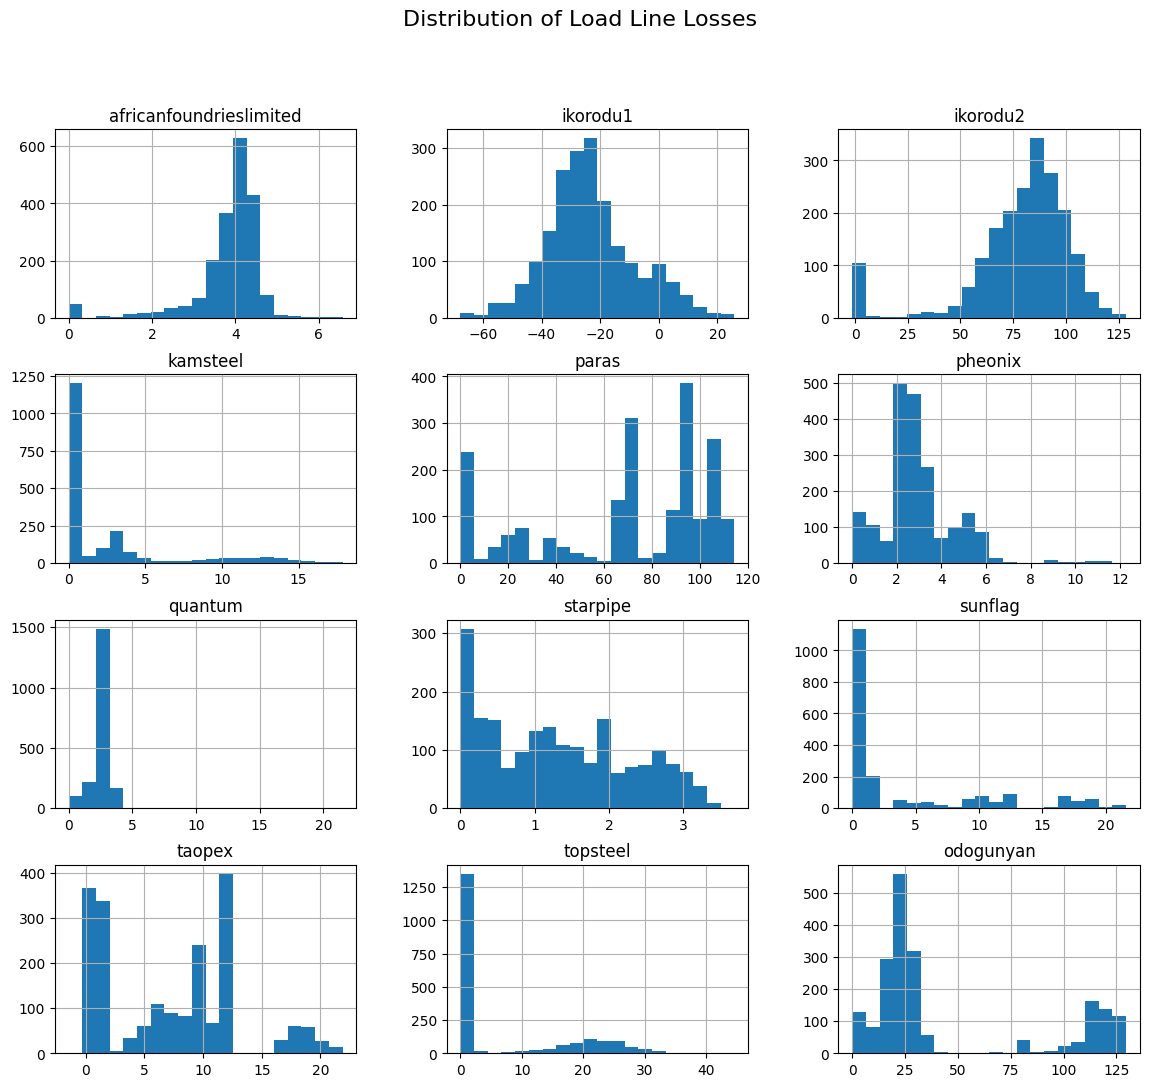

In [ ]:
# List of load line loss columns
load_columns = ['africanfoundrieslimited', 'ikorodu1', 'ikorodu2', 'kamsteel',
                'paras', 'pheonix', 'quantum', 'starpipe', 'sunflag',
                'taopex', 'topsteel', 'odogunyan']

# Plot histograms for each load line loss
data[load_columns].hist(bins=20, figsize=(14, 12))
plt.suptitle('Distribution of Load Line Losses', fontsize=16)
plt.show()

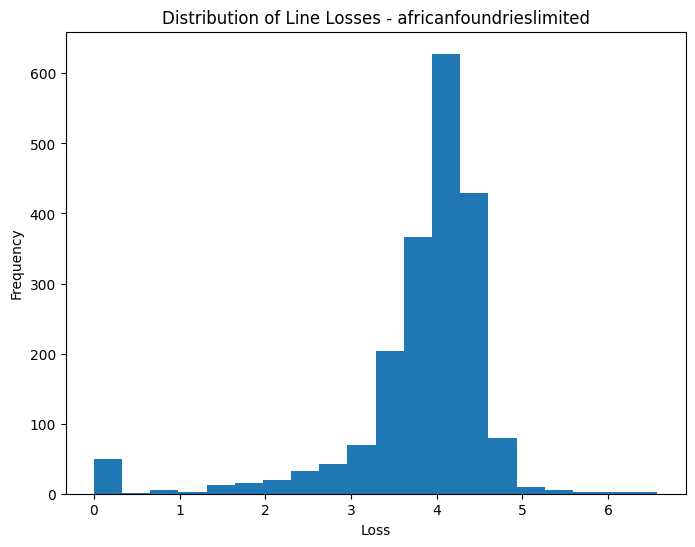

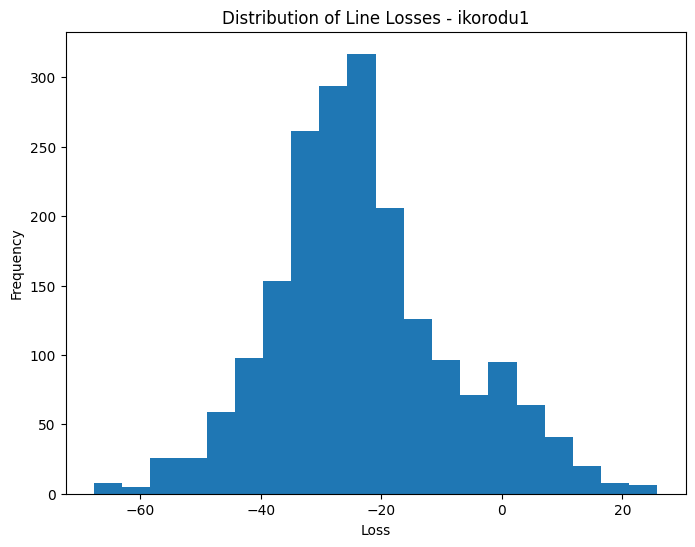

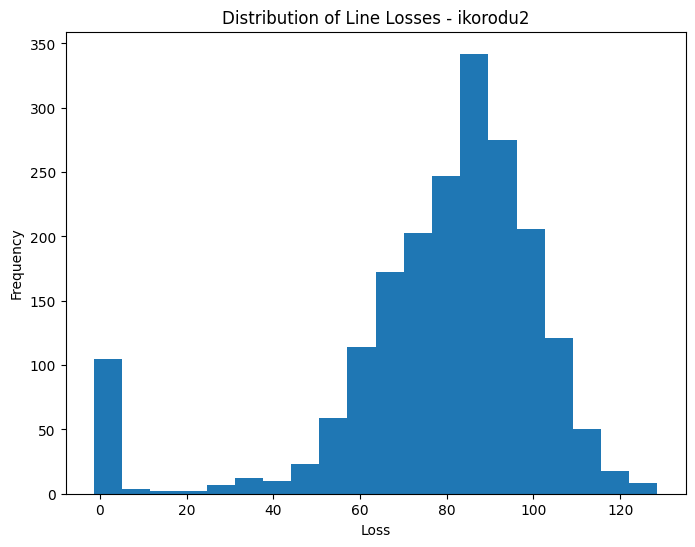

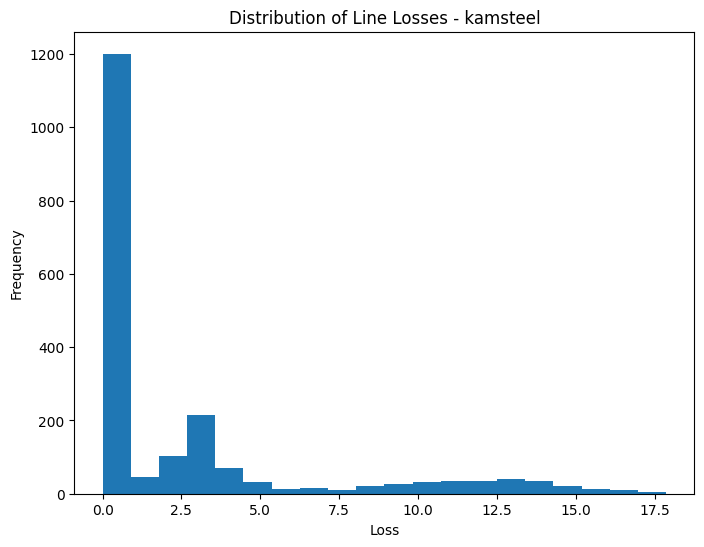

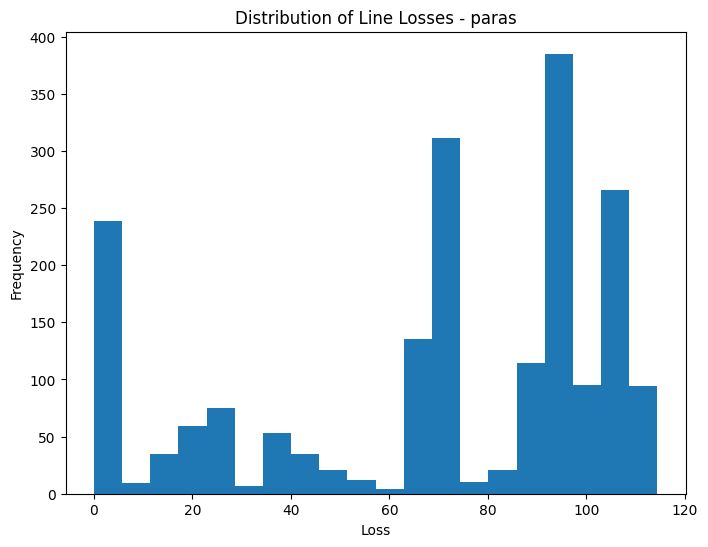

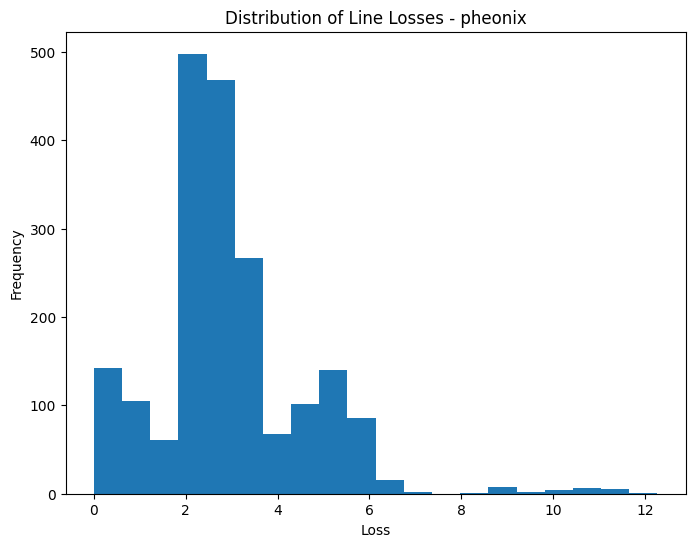

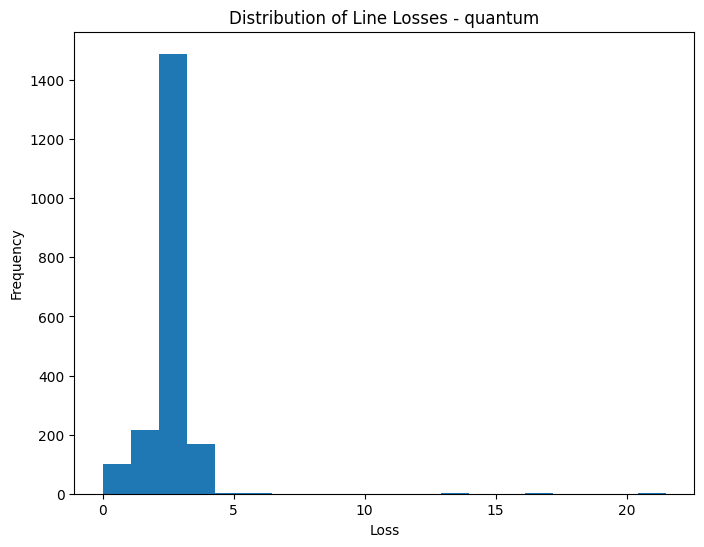

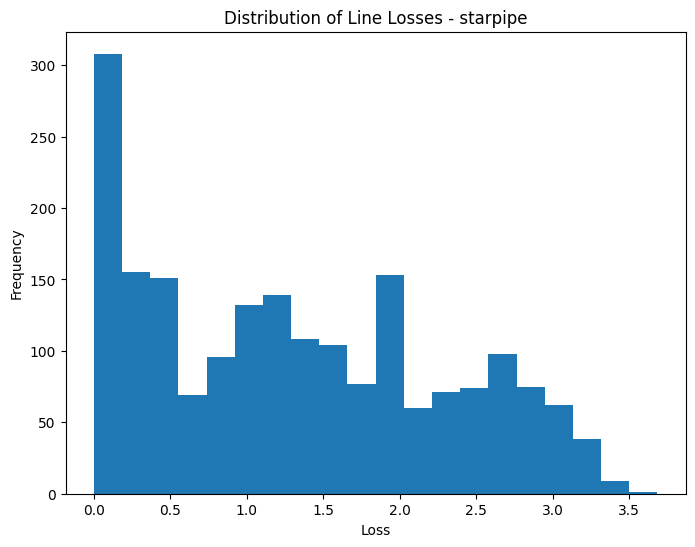

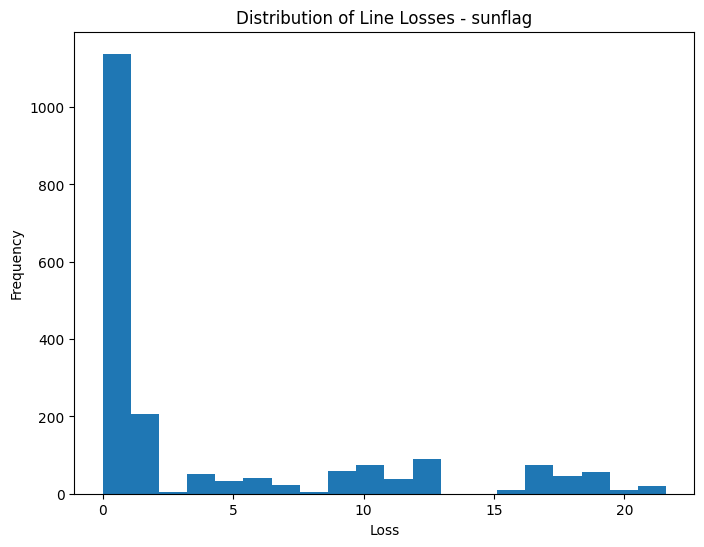

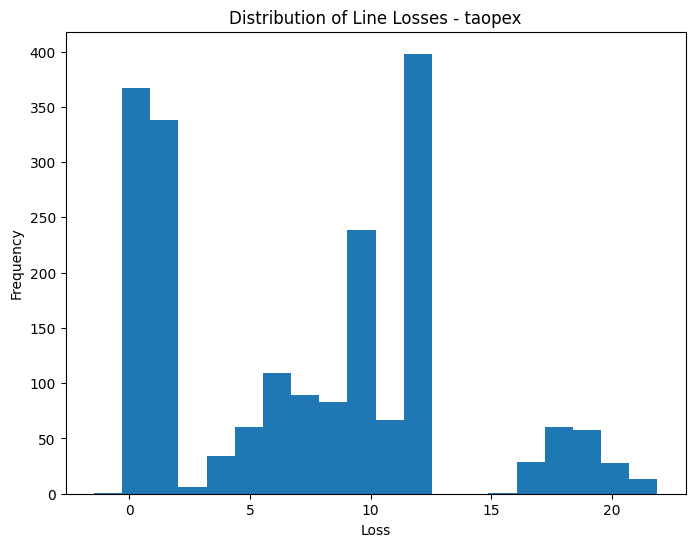

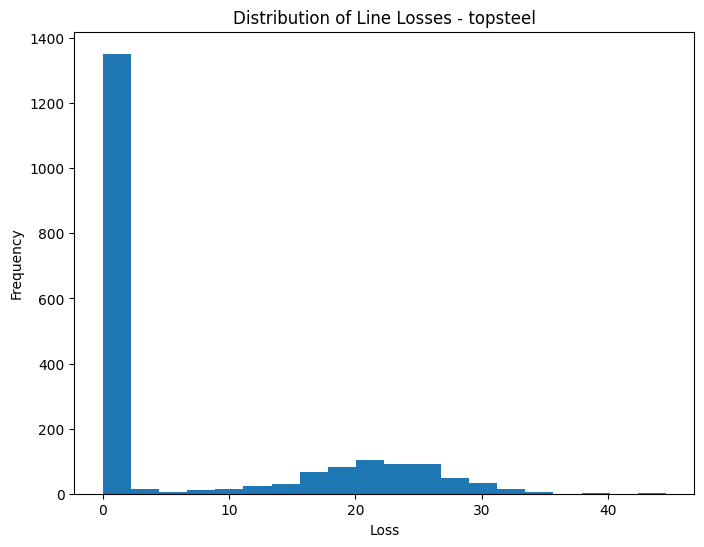

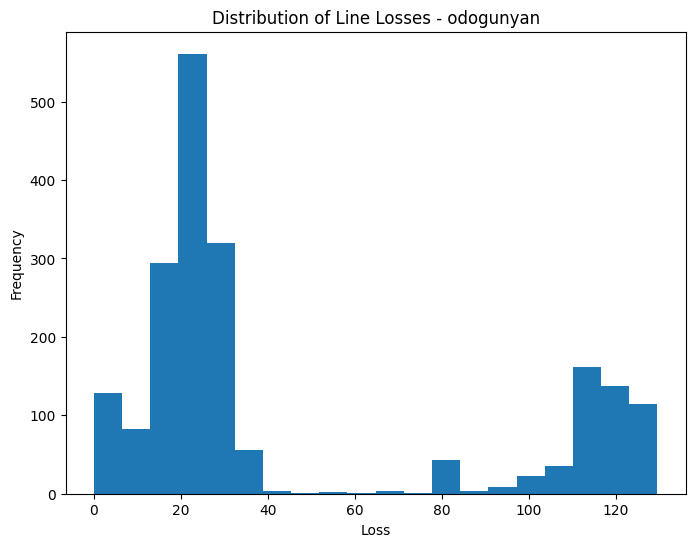

In [ ]:

import matplotlib.pyplot as plt

# List of load line loss columns
load_columns = ['africanfoundrieslimited', 'ikorodu1', 'ikorodu2', 'kamsteel',
                'paras', 'pheonix', 'quantum', 'starpipe', 'sunflag',
                'taopex', 'topsteel', 'odogunyan']

# Plotting each load line loss separately
for column in load_columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(data[column], bins=20)
    plt.xlabel(f'Loss')  # Unique x-axis label
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Line Losses - {column}')
    plt.show()


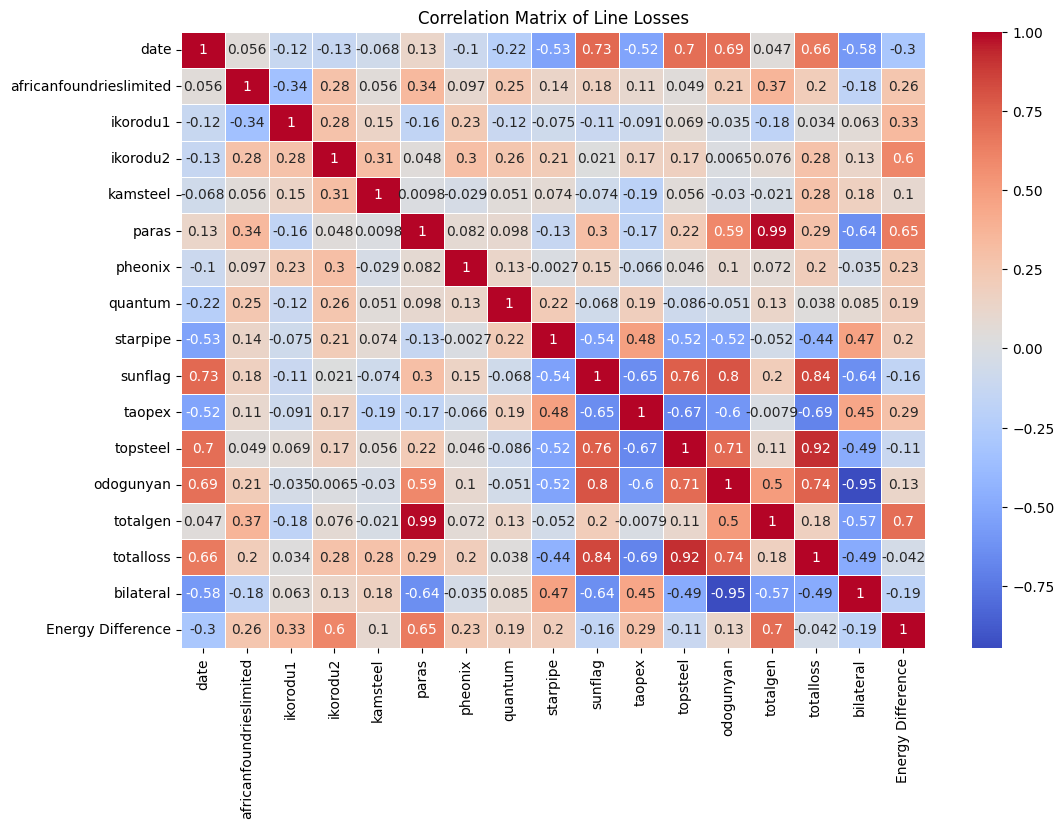

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Line Losses')
plt.show()

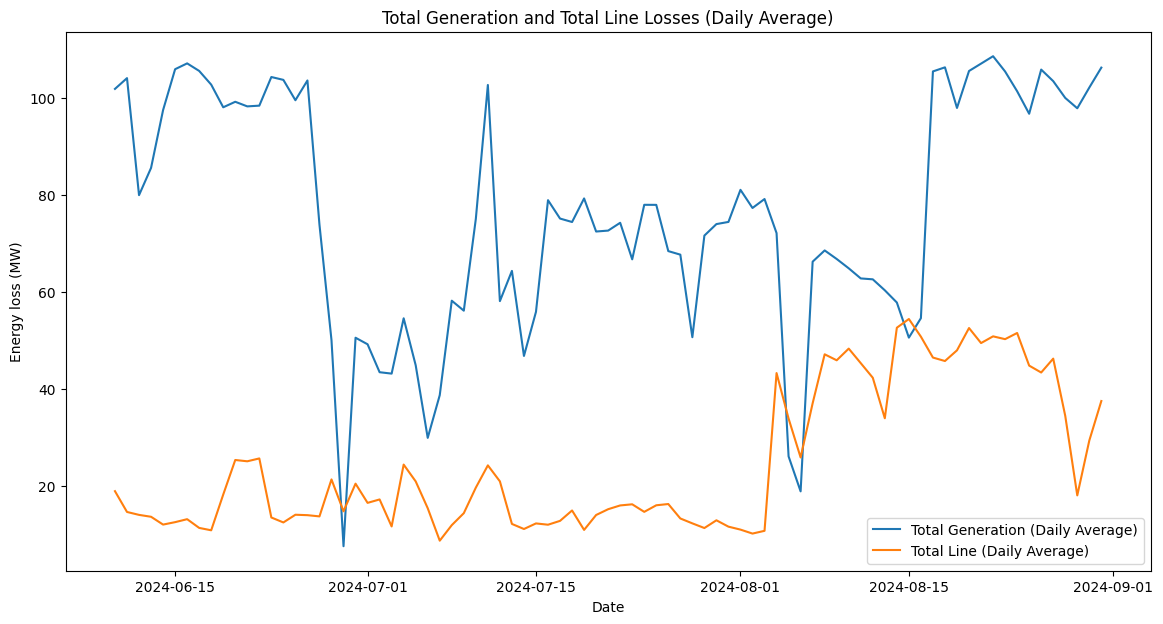

In [ ]:
# Resample the data by day and take the mean
# Set the 'date' column as the index before resampling
daily_data = data.set_index('date').resample('D').mean()

# Plot Total Generation and Total Loss over time (daily average)
plt.figure(figsize=(14, 7))
plt.plot(daily_data['totalgen'], label='Total Generation (Daily Average)')
plt.plot(daily_data['totalloss'], label='Total Line (Daily Average)')
plt.xlabel('Date')
plt.ylabel('Energy loss (MW)')
plt.title('Total Generation and Total Line Losses (Daily Average)')
plt.legend()
plt.show()

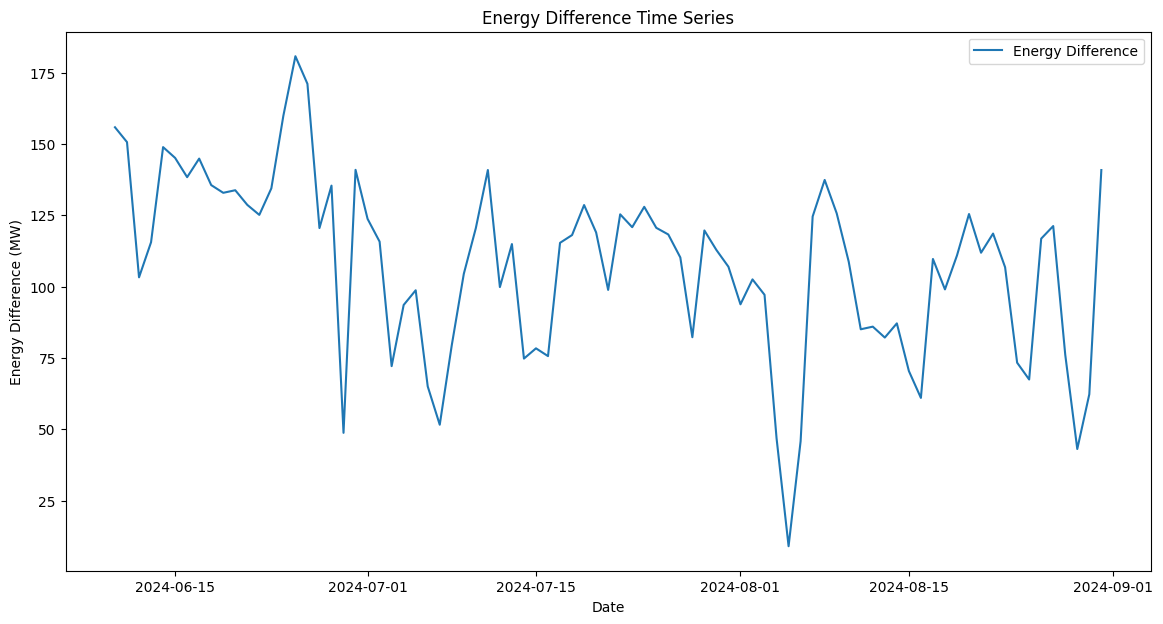

In [ ]:
# Plot the Difference column over time
plt.figure(figsize=(14, 7))
plt.plot(daily_data['Energy Difference'], label='Energy Difference')
plt.xlabel('Date')
plt.ylabel('Energy Difference (MW)')
plt.title('Energy Difference Time Series')
plt.legend()
plt.show()

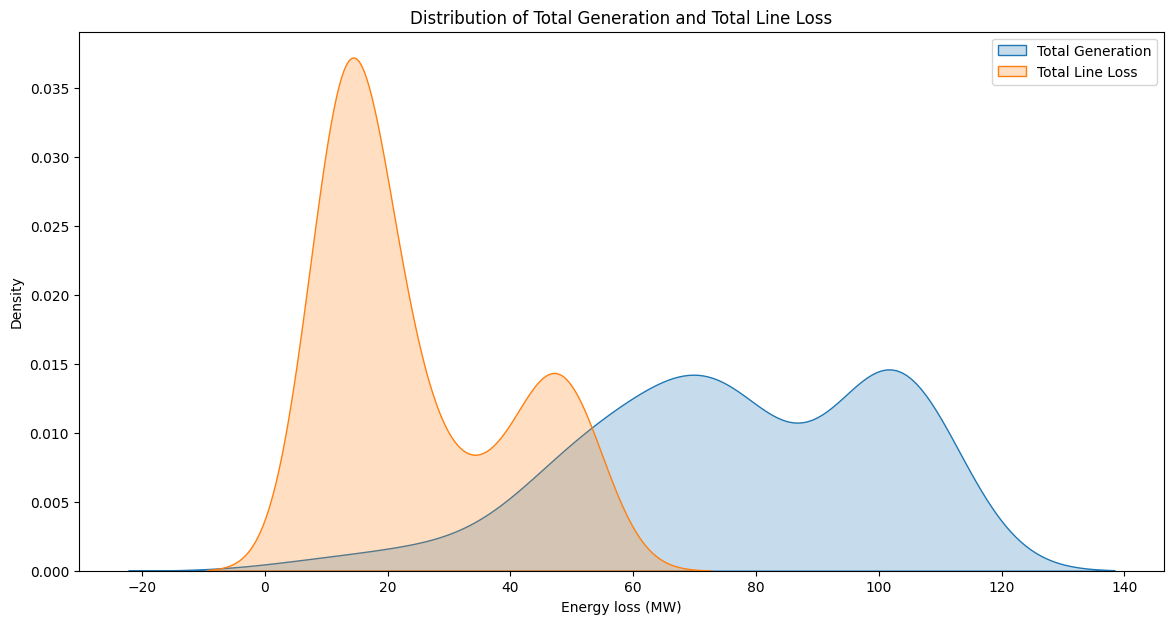

In [ ]:
#Compare the distribution of totalgen and totalloss to see if there are discrepancies.
plt.figure(figsize=(14, 7))
sns.kdeplot(daily_data['totalgen'], label='Total Generation', fill=True)
sns.kdeplot(daily_data['totalloss'], label='Total Line Loss', fill=True)
plt.xlabel('Energy loss (MW)')
plt.title('Distribution of Total Generation and Total Line Loss')
plt.legend()
plt.show()

# Feature Engineering

In [ ]:
# Step 1: Determine the maximum value of the 'difference' column
max_difference = data['Energy Difference'].max()
max_difference

218.9665848006803

In [ ]:
# # Step 2: Calculate percentage thresholds
# thresholds = {
#     'Energy Theft': 0.55 * max_difference,
#     'Resistive Loss': 0.35 * max_difference,
#     'Corona Loss': 0.20 * max_difference,
#     'Reactive Loss': 0.10 * max_difference,
#     'Normal Loss': 0.05 * max_difference,
#     'Metering Issues': 0.05 * max_difference  # For < 5%
# }

In [ ]:
#Step 2: Calculate percentage thresholds
thresholds = {
    'Energy Theft': 0.40 * max_difference,
    'Resistive Loss': 0.30 * max_difference,
    'Corona Loss': 0.20 * max_difference,
    'Reactive Loss': 0.10 * max_difference,
    'Normal Loss': 0.05 * max_difference,
    'Metering Issues': 0.05 * max_difference  # For < 5%
}

In [ ]:
# Step 3: Define a function to classify the losses
def classify_loss(value):
    if value > thresholds['Energy Theft']:
        return 'Energy Theft'
    elif value > thresholds['Resistive Loss']:
        return 'Resistive Loss'
    elif value > thresholds['Corona Loss']:
        return 'Corona Loss'
    elif value > thresholds['Reactive Loss']:
        return 'Reactive Loss'
    elif value > thresholds['Normal Loss']:
        return 'Normal Loss'
    else:
        return 'Metering Issues'


# Apply the classification function
data['loss_type'] = data['Energy Difference'].apply(classify_loss)

# Display the updated DataFrame
print(data[['Energy Difference', 'loss_type']])

      Energy Difference       loss_type
0            123.680000    Energy Theft
1            104.990000    Energy Theft
2            107.855130    Energy Theft
3             80.801909  Resistive Loss
4             86.948680  Resistive Loss
...                 ...             ...
1975         140.050000    Energy Theft
1976         178.850000    Energy Theft
1977         167.300000    Energy Theft
1978         158.290000    Energy Theft
1979         152.310000    Energy Theft

[1980 rows x 2 columns]


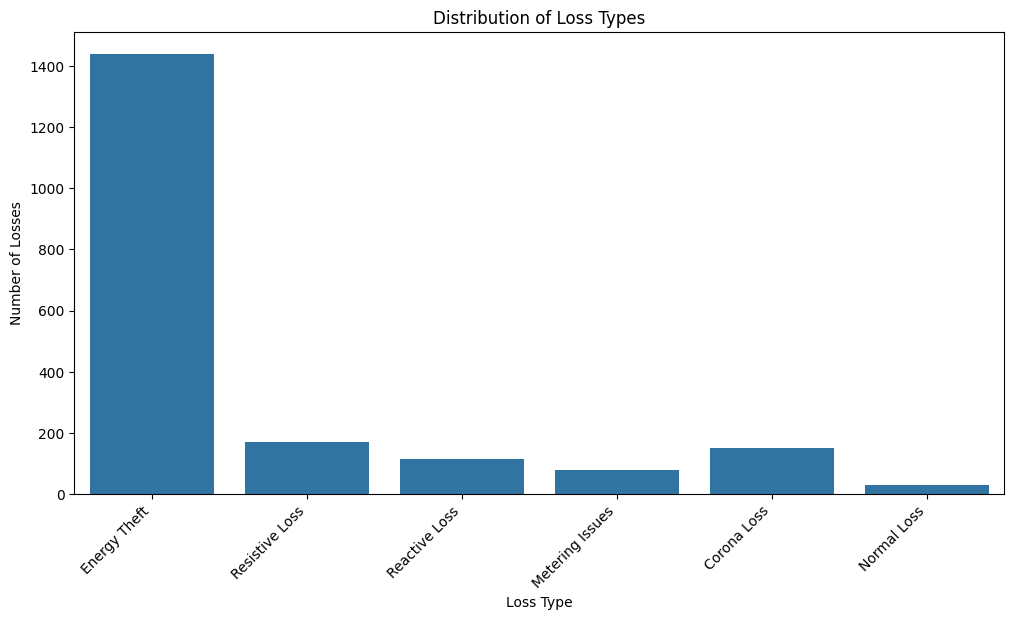

In [ ]:
#Plot the Loss Types in Bar Graph
plt.figure(figsize=(12, 6))
sns.countplot(x='loss_type', data=data)
plt.title('Distribution of Loss Types')
plt.xlabel('Loss Type')
plt.ylabel('Number of Losses')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
data['loss_type'].value_counts()

,count
loss_type,
Energy Theft,1440
Resistive Loss,169
Corona Loss,150
Reactive Loss,113
Metering Issues,79
Normal Loss,29


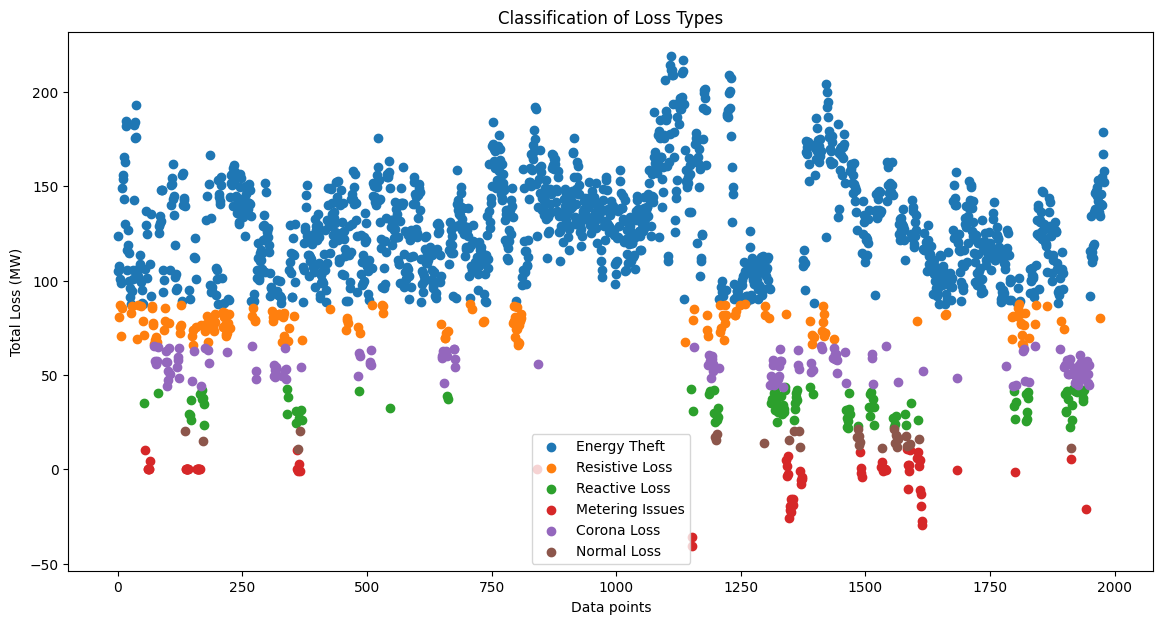

In [ ]:
# Plotting to visualize the classification

plt.figure(figsize=(14, 7))
for fault_type in data['loss_type'].unique():
    fault_data = data[data['loss_type'] == fault_type]
    plt.scatter(fault_data.index, fault_data['Energy Difference'], label=fault_type)

plt.xlabel('Data points')
plt.ylabel('Total Loss (MW)')
plt.title('Classification of Loss Types')
plt.legend()
plt.show()

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['loss_type_encoded'] = label_encoder.fit_transform(data['loss_type'])
data.head()

,date,africanfoundrieslimited,ikorodu1,ikorodu2,kamsteel,paras,pheonix,quantum,starpipe,sunflag,taopex,topsteel,odogunyan,totalgen,totalloss,bilateral,Energy Difference,loss_type,loss_type_encoded
0,2024-07-01 00:00:00,4.07,13.58,102.41,0.000000,18.06,8.99,3.42,2.35,1.76,11.16,0.94,21.2,29.22,21.530000,0.330000,123.680000,Energy Theft,1
1,2024-07-01 01:00:00,3.75,17.41,97.56,0.000000,0.00,8.95,3.16,1.94,1.56,10.13,0.75,20.7,10.13,20.110000,-0.590000,104.990000,Energy Theft,1
2,2024-07-01 02:00:00,3.66,21.43,97.72,2.344870,0.00,10.03,1.88,2.33,1.60,11.32,0.77,20.2,11.32,22.614870,2.414870,107.855130,Energy Theft,1
3,2024-07-01 03:00:00,4.40,5.35,87.78,2.348091,0.00,11.38,1.93,1.92,1.07,11.32,0.60,21.2,11.32,23.648091,2.448091,80.801909,Resistive Loss,5
4,2024-07-01 04:00:00,4.33,1.75,97.40,2.351320,0.00,10.57,2.28,2.08,1.27,11.32,0.64,23.7,11.32,23.521320,-0.178680,86.948680,Resistive Loss,5


In [ ]:
# Print the mapping between loss types and encoded numbers
for i, loss_type in enumerate(label_encoder.classes_):
    print(f"{loss_type}: {i}")

Corona Loss: 0
Energy Theft: 1
Metering Issues: 2
Normal Loss: 3
Reactive Loss: 4
Resistive Loss: 5


## Select Features

In [ ]:
# Separate features and one-hot encoded target
X = data.drop(columns=['date','loss_type',	'loss_type_encoded', 'bilateral', 'Energy Difference', 'totalgen', 'totalloss'])
y = data['loss_type_encoded']

# Check the shapes of features and targets
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1980, 12)
Target shape: (1980,)


Select with Random Forest

In [ ]:
# With Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                    Feature  Importance
4                     paras    0.245677
2                  ikorodu2    0.129492
1                  ikorodu1    0.122539
11                odogunyan    0.085482
9                    taopex    0.080394
8                   sunflag    0.069307
10                 topsteel    0.067686
5                   pheonix    0.051105
7                  starpipe    0.046332
0   africanfoundrieslimited    0.044476
6                   quantum    0.033993
3                  kamsteel    0.023518


## Prepare Data for training

In [ ]:
# Normalize features
scaler = MinMaxScaler()

# Exclude the 'date' column from scaling
#X_to_scale = X.select_dtypes(exclude=['datetime64[ns]'])  # Select only numerical columns

X_scaled = scaler.fit_transform(X)

# If you need the 'date' column back, you can re-attach it:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
#X_scaled['date'] = X['date']  # Add back the 'date' column

# Reshape data for LSTM
time_steps = 1  # Example: using 5 previous time steps

X_reshaped = []
y_reshaped = []


for i in range(len(X_scaled) - time_steps):
    X_reshaped.append(X_scaled.iloc[i:i + time_steps].values)  # Use .iloc for indexing
    y_reshaped.append(y.iloc[i + time_steps])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1583, 1, 12)
y_train shape: (1583,)


# Model Training

## LSTM Training

In [ ]:
# Define an LSTM model for training
def build_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with Dropout
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))

    # Second LSTM layer
    model.add(LSTM(32, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer for classification (number of units should match the number of classes)
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Use softmax for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Get input shape from the training data
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Build the model
lstm_model = build_lstm_model(input_shape)

# Display the model summary
lstm_model.summary()




/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 1, 64)               │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 32,326 (126.27 KB)

 Trainable params: 32,326 (126.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history = lstm_model.fit(X_train, y_train,
                    epochs=150,        # Number of epochs
                    batch_size=32,    # Batch size (can be tuned)
                    validation_split=0.2,  # Validation data
                    verbose=1)        # Display progress per epoch


Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6982 - loss: 1.7449 - val_accuracy: 0.7539 - val_loss: 1.5039
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7176 - loss: 1.3252 - val_accuracy: 0.7539 - val_loss: 0.8531
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7317 - loss: 0.9019 - val_accuracy: 0.7539 - val_loss: 0.7858
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7312 - loss: 0.8384 - val_accuracy: 0.7539 - val_loss: 0.7529
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7248 - loss: 0.8276 - val_accuracy: 0.7539 - val_loss: 0.7213
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7208 - loss: 0.7929 - val_accuracy: 0.7539 - val_loss: 0.6961
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7329 - loss: 0.7506 - val_accuracy: 0.7603 - val_loss: 0.6768
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7483 - loss: 0.7068 - val_accuracy: 0.76

In [ ]:
### Model Evaluation
# Evaluate the model on the test set
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8574 - loss: 0.4456 
Test Loss: 0.4957
Test Accuracy: 83.33%


In [ ]:
### Calcuate Performance Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict the classes on test set
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


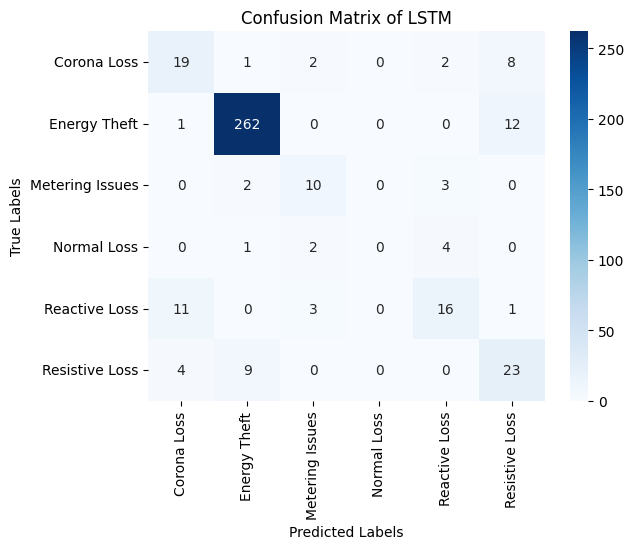

Classification Report:
                  precision    recall  f1-score   support

    Corona Loss       0.54      0.59      0.57        32
   Energy Theft       0.95      0.95      0.95       275
Metering Issues       0.59      0.67      0.62        15
    Normal Loss       0.00      0.00      0.00         7
  Reactive Loss       0.64      0.52      0.57        31
 Resistive Loss       0.52      0.64      0.57        36

       accuracy                           0.83       396
      macro avg       0.54      0.56      0.55       396
   weighted avg       0.83      0.83      0.83       396



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes) # Calculate and assign to conf_matrix

# Get class names from label encoder
class_names = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of LSTM")
plt.show()

# Classification report
class_report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)

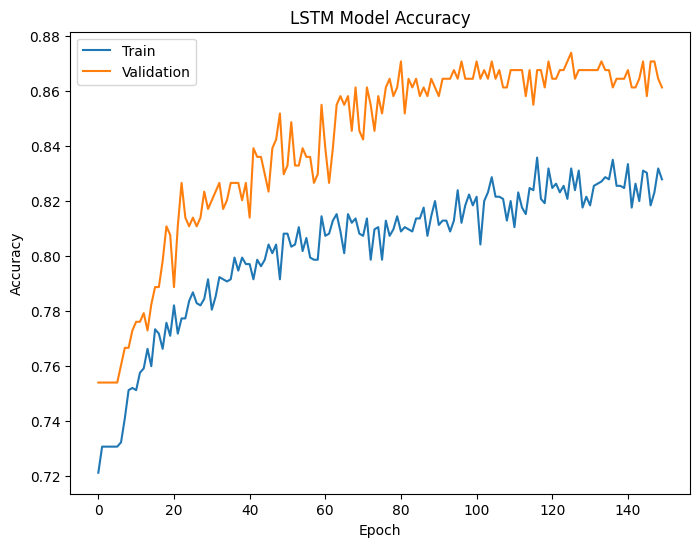

In [ ]:
### Plotting Training and Validation Metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')




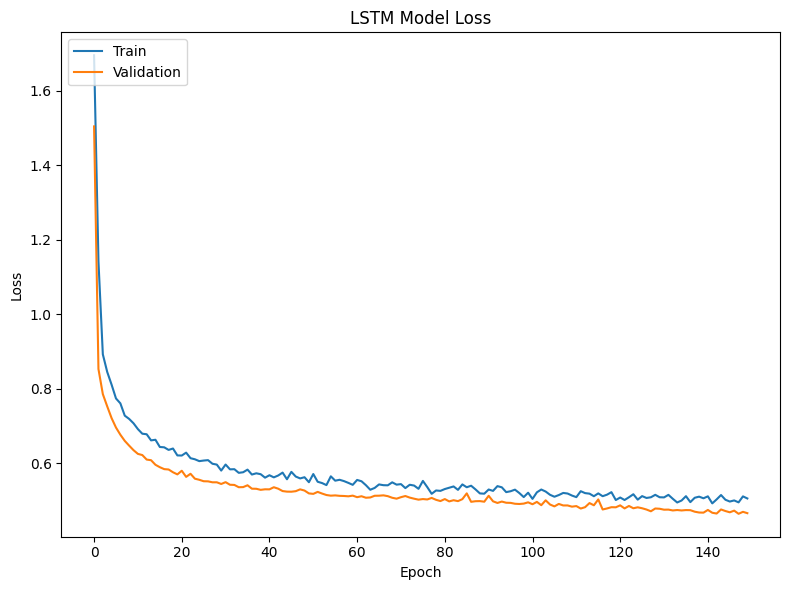

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### LSTM Model Tuning

In [ ]:
# Define a function to build the model with tunable hyperparameters
def build_lstm_model(hp):
    inputs = Input(shape=input_shape)

    # First LSTM layer with tunable units and dropout
    x = LSTM(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
             activation='relu', return_sequences=True)(inputs)
    x = Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1))(x)

    # Second LSTM layer with tunable units and dropout
    x = LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
             activation='relu')(x)
    x = Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1))(x)
    num_classes = len(np.unique(y_train))
    # Output layer for classification
    outputs = Dense(num_classes, activation='softmax')(x)

    # Compile the model with a learning rate that can be tuned
    model = Model(inputs, outputs)
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',  # Use sparse for label-encoded targets
        metrics=['accuracy']
    )
    return model

In [ ]:
# Setup the Keras Tuner random search
tuner = RandomSearch(
    build_lstm_model,
    objective='val_accuracy',  # Tuning based on validation accuracy
    max_trials=3,  # Number of random combinations to test
    executions_per_trial=1,  # Number of times to train the model for each trial
    directory='my_dir',  # Where to save the results
    project_name='random_search'
)

# Fit the tuner to the data
tuner.search(X_train, y_train, epochs=50, validation_split= 0.2)


Reloading Tuner from my_dir/random_search/tuner0.json


In [ ]:
# Get the best model after Random Search
best_models = tuner.get_best_models(num_models=1)  # Get a list of best models
best_model = best_models[0]  # Access the first (and only) model in the list

# Evaluate the best model on test data
best_model.evaluate(X_test, y_test)

# Print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters()[0]  # Remove num_models argument
print(f"Best Hyperparameters: {best_hyperparameters.values}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8573 - loss: 0.4554  
Best Hyperparameters: {'units_1': 64, 'dropout_1': 0.30000000000000004, 'units_2': 64, 'dropout_2': 0.2, 'learning_rate': 0.001619964416868265}


In [ ]:
# Build the LSTM model using the best hyperparameters
best_model = build_lstm_model(best_hyperparameters)

# Retrain the model with the best hyperparameters
best_model.fit(X_train, y_train,
               epochs=150,  # You can adjust the number of epochs
               batch_size=64,  # You can adjust the batch size
               validation_split=0.2)  # Use validation data during training

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.5406 - loss: 1.7713 - val_accuracy: 0.7539 - val_loss: 1.6643
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7416 - loss: 1.5805 - val_accuracy: 0.7539 - val_loss: 1.0884
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7145 - loss: 1.0336 - val_accuracy: 0.7539 - val_loss: 0.8326
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7197 - loss: 0.9200 - val_accuracy: 0.7539 - val_loss: 0.7884
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7242 - loss: 0.8682 - val_accuracy: 0.7539 - val_loss: 0.7586
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7228 - loss: 0.8388 - val_accuracy: 0.7539 - val_loss: 0.7348
Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7307 - loss: 0.7953 - val_accuracy: 0.7539 - val_loss: 0.7087
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7341 - loss: 0.7708 - val_accuracy: 0.753

In [ ]:
# Evaluate the retrained model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8387 - loss: 0.4418 
Test Loss: 0.48131799697875977
Test Accuracy: 0.8358585834503174


## LSTM with Attention Mechanism

In [ ]:
# Define an LSTM model with attention
def build_lstm_attention_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # LSTM layers
    x = LSTM(32, activation='relu', return_sequences=True)(inputs)
    x = Dropout(0.5)(x)

    # Attention mechanism
    attention_weights = Dense(64, activation='tanh', kernel_regularizer=l2(0.001))(x)
    attention_weights = Dense(1, activation='tanh')(attention_weights)
    attention_weights = Reshape((input_shape[0],))(attention_weights)  # Flatten across time steps
    attention_weights = Dense(input_shape[0], activation='softmax')(attention_weights)  # Softmax across time steps
    attention_weights = Reshape((input_shape[0], 1))(attention_weights)  # Reshape to match LSTM output shape

    # Element-wise multiplication of attention weights and LSTM output
    attention_output = Multiply()([x, attention_weights])

    # Additional LSTM layer after attention
    x = LSTM(64, activation='relu')(attention_output)
    x = Dropout(0.2)(x)

    # Output layer for classification
    outputs = Dense(num_classes, activation='softmax')(x)

    # Compile the model with `sparse_categorical_crossentropy` for label-encoded targets
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Build and compile the model
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)
num_classes = len(np.unique(y_train))  # Number of unique classes in label-encoded y_train
model = build_lstm_attention_model(input_shape, num_classes)

# Display the model summary
model.summary()



Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 1, 12)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_10 (LSTM)            │ (None, 1, 32)          │          5,760 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 1, 32)          │              0 │ lstm_10[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1, 64)          │          2,112 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 1, 1)           │             65 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 1)              │              0 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 1)              │              2 │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_3 (Reshape)       │ (None, 1, 1)           │              0 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply_1 (Multiply)     │ (None, 1, 32)          │              0 │ dropout_12[0][0],      │
│                           │                        │                │ reshape_3[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_11 (LSTM)            │ (None, 64)             │         24,832 │ multiply_1[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 64)             │              0 │ lstm_11[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 6)              │            390 │ dropout_13[0][0]       │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,161 (129.54 KB)

 Trainable params: 33,161 (129.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history = model.fit(X_train, y_train,
                    epochs=150, batch_size=32,
                    validation_split=0.2,  # Validation data,
                    verbose=1)

Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6224 - loss: 1.7956 - val_accuracy: 0.7539 - val_loss: 1.6180
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7467 - loss: 1.4737 - val_accuracy: 0.7539 - val_loss: 0.8842
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7277 - loss: 0.9620 - val_accuracy: 0.7539 - val_loss: 0.8158
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7516 - loss: 0.8391 - val_accuracy: 0.7539 - val_loss: 0.7860
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7459 - loss: 0.8376 - val_accuracy: 0.7539 - val_loss: 0.7570
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7309 - loss: 0.8509 - val_accuracy: 0.7539 - val_loss: 0.7337
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7391 - loss: 0.8045 - val_accuracy: 0.7539 - val_loss: 0.7156
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7283 - loss: 0.8121 - val_accuracy: 0.7539 - val_loss: 0

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8435 - loss: 0.4527 
Test Loss: 0.5024
Test Accuracy: 0.8384


In [ ]:
# Make predictions
y_pred_lstm_att = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_lstm_att, axis=1)  # Convert predictions to class indices
#y_test_classes = np.argmax(y_test, axis=1)  # Convert true labels to class indices


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


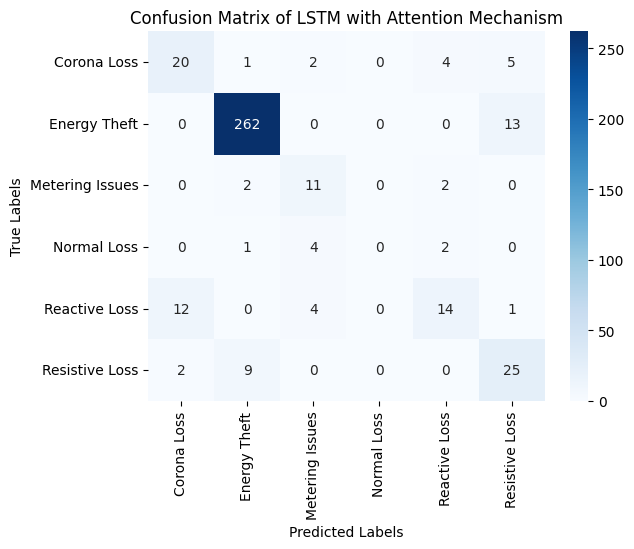

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        32
           1       0.95      0.95      0.95       275
           2       0.52      0.73      0.61        15
           3       0.00      0.00      0.00         7
           4       0.64      0.45      0.53        31
           5       0.57      0.69      0.62        36

    accuracy                           0.84       396
   macro avg       0.54      0.58      0.55       396
weighted avg       0.83      0.84      0.83       396



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes) # Calculate and assign to conf_matrix

# Get class names from label encoder
class_names = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of LSTM with Attention Mechanism")
plt.show()

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

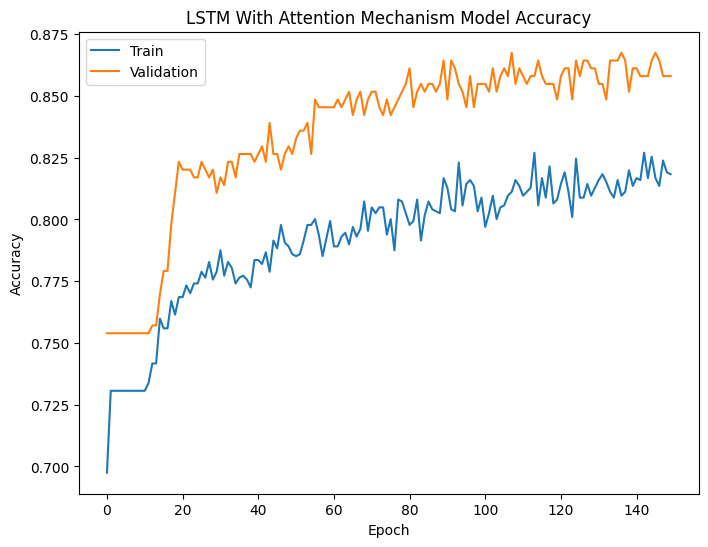

In [ ]:
### Plotting Training and Validation Metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM With Attention Mechanism Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


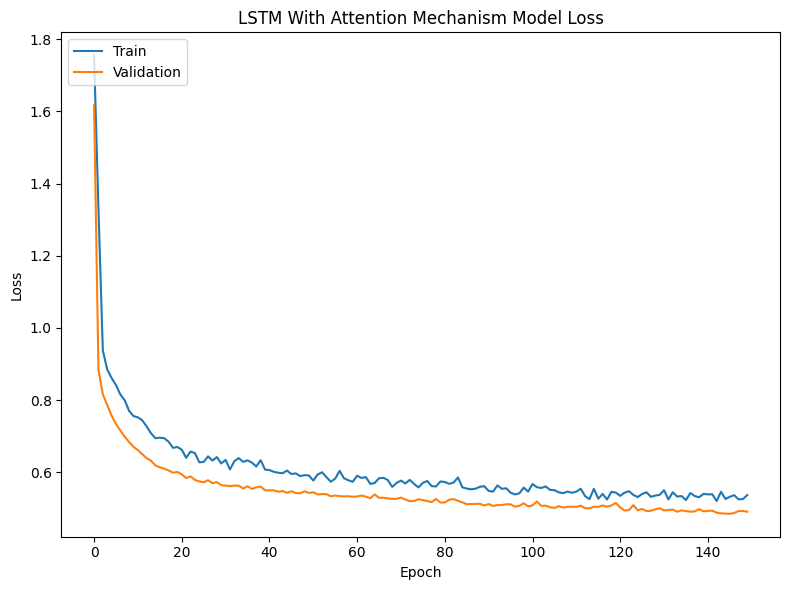

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM With Attention Mechanism Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## BiLSTM Training

In [ ]:
def build_bidirectional_lstm(input_shape, num_classes):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, activation='relu'), input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Get input shape from the training data
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)
num_classes =len(np.unique(y_train)) # Number of unique classes in y_train

# Build the model
bi_lstm_model = build_bidirectional_lstm(input_shape, num_classes) #Modified Line


# Display the model summary
bi_lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional)      │ (None, 128)                 │          39,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,750 (170.90 KB)

 Trainable params: 43,750 (170.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = bi_lstm_model.fit(X_train, y_train,
                    epochs=150,        # Number of epochs
                    batch_size=32,    # Batch size (can be tuned)
                    validation_split=0.2,  # Validation data
                    verbose=1)        # Display progress per epoch

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5067 - loss: 1.7071 - val_accuracy: 0.7539 - val_loss: 1.2433
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7391 - loss: 1.1082 - val_accuracy: 0.7539 - val_loss: 0.8523
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7439 - loss: 0.8548 - val_accuracy: 0.7539 - val_loss: 0.7900
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7468 - loss: 0.7998 - val_accuracy: 0.7539 - val_loss: 0.7406
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7199 - loss: 0.7998 - val_accuracy: 0.7539 - val_loss: 0.6899
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7448 - loss: 0.7004 - val_accuracy: 0.7571 - val_loss: 0.6576
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7369 - loss: 0.7063 - val_accuracy: 0.7603 - val_loss: 0.6325
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7456 - loss: 0.6859 - val_accuracy: 0.7729 - 

In [ ]:
# Evaluate the model
loss, accuracy = bi_lstm_model.evaluate(X_test, y_test)
print(f"BiLSTM Test Loss: {loss:.4f}")
print(f"BiLSTM Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8228 - loss: 0.4497 
BiLSTM Test Loss: 0.4847
BiLSTM Test Accuracy: 0.8207


In [ ]:
# Make predictions
y_pred_bilstm = bi_lstm_model.predict(X_test)
y_pred_class_bilstm = np.argmax(y_pred_bilstm, axis=1)  # Convert predictions to class indices
#y_test_classes = np.argmax(y_test, axis=1)  # Convert true labels to class indices


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


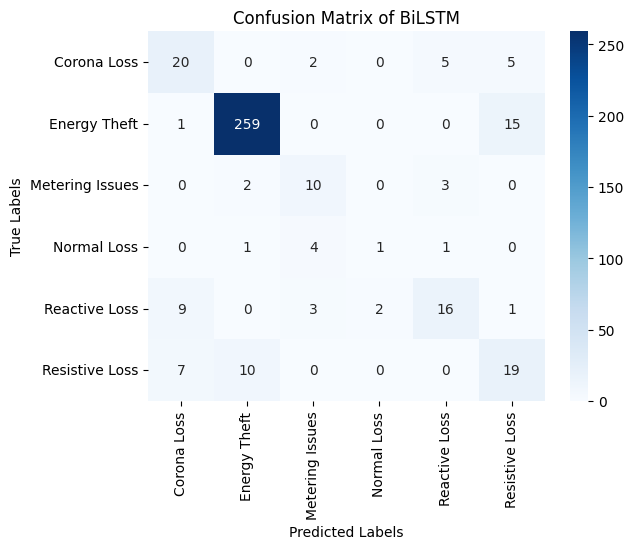

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        32
           1       0.95      0.94      0.95       275
           2       0.53      0.67      0.59        15
           3       0.33      0.14      0.20         7
           4       0.64      0.52      0.57        31
           5       0.47      0.53      0.50        36

    accuracy                           0.82       396
   macro avg       0.58      0.57      0.56       396
weighted avg       0.82      0.82      0.82       396



In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class_bilstm) # Calculate and assign to conf_matrix

# Get class names from label encoder
class_names = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of BiLSTM")
plt.show()

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_class_bilstm))

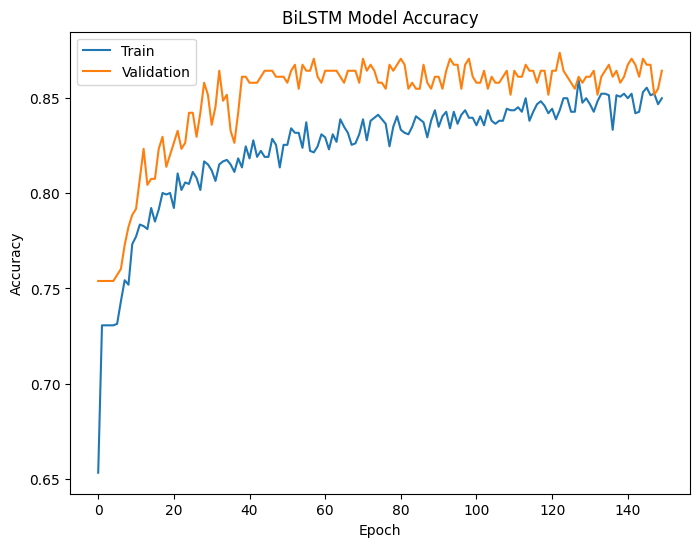

In [ ]:
### Plotting Training and Validation Metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('BiLSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')




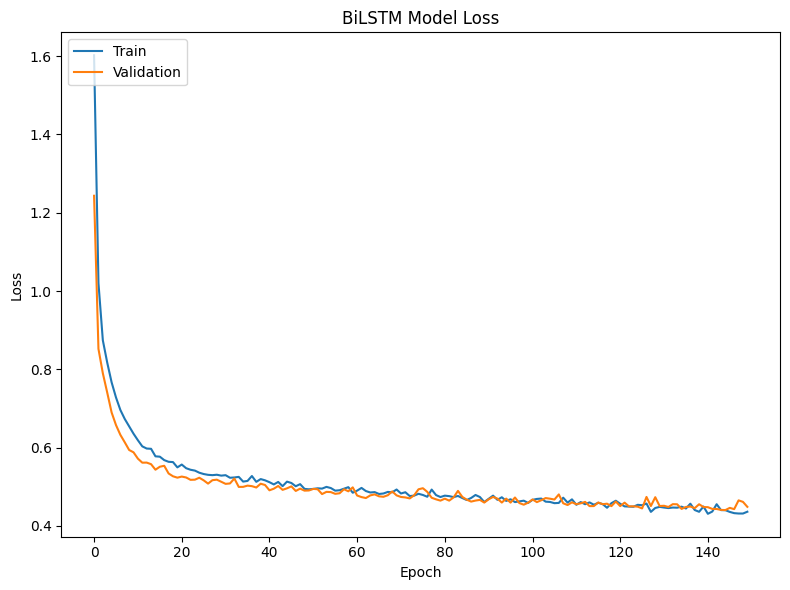

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('BiLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

## GRU Training

In [ ]:
# Define a GRU model for training
def build_gru_model(input_shape):
    model = Sequential()

    # First GRU layer with Dropout
    model.add(GRU(64, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))

    # Second GRU layer
    model.add(GRU(32, activation='relu'))
    model.add(Dropout(0.2))

    # Output layer for classification (number of units should match the number of classes)
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Use softmax for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Get input shape from the training data
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)

# Build the model
gru_model = build_gru_model(input_shape)

# Display the model summary
gru_model.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 64)               │          14,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             198 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,582 (96.02 KB)

 Trainable params: 24,582 (96.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
# Assuming you have already split the data into X_train, y_train, X_test, and y_test
gru_model.fit(X_train, y_train,
              epochs=150,
              batch_size=32, validation_split=0.2,
              verbose=1)


Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.7159 - loss: 1.1216 - val_accuracy: 0.7539 - val_loss: 0.8347
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7341 - loss: 0.9220 - val_accuracy: 0.7539 - val_loss: 0.7736
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7333 - loss: 0.8525 - val_accuracy: 0.7539 - val_loss: 0.7267
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7305 - loss: 0.8051 - val_accuracy: 0.7539 - val_loss: 0.6898
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7538 - loss: 0.7304 - val_accuracy: 0.7634 - val_loss: 0.6611
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7197 - loss: 0.7963 - val_accuracy: 0.7666 - val_loss: 0.6345
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7557 - loss: 0.6948 - val_accuracy: 0.7760 - val_loss: 0.6216
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7530 - loss: 0.6893 - val_accuracy: 0.7666

In [ ]:
# Evaluate the model on the test data
loss, accuracy = gru_model.evaluate(X_test, y_test, verbose=1)

# Print evaluation results
print(f"GRU Test Loss: {loss}")
print(f"GRU Test Accuracy: {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8357 - loss: 0.4483 
GRU Test Loss: 0.4867357909679413
GRU Test Accuracy: 0.8308081030845642


In [ ]:
# Make predictions
y_pred_gru = gru_model.predict(X_test)
y_pred_class_gru = np.argmax(y_pred_gru, axis=1)  # Convert predictions to class indices

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


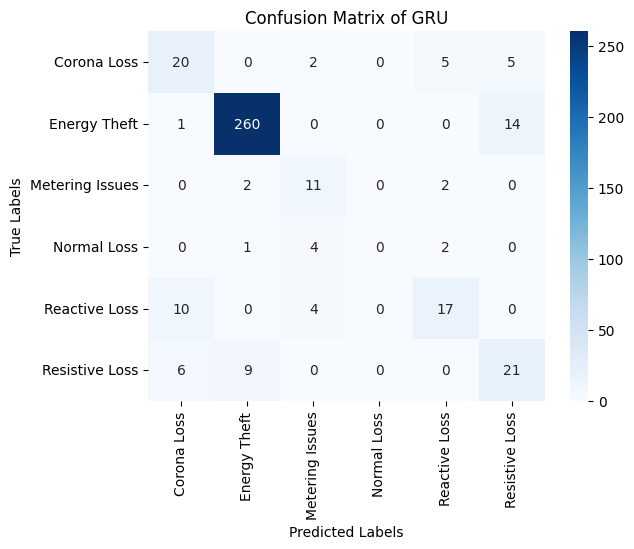

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58        32
           1       0.96      0.95      0.95       275
           2       0.52      0.73      0.61        15
           3       0.00      0.00      0.00         7
           4       0.65      0.55      0.60        31
           5       0.53      0.58      0.55        36

    accuracy                           0.83       396
   macro avg       0.53      0.57      0.55       396
weighted avg       0.83      0.83      0.83       396



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class_gru) # Calculate and assign to conf_matrix

# Get class names from label encoder
class_names = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of GRU")
plt.show()

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_class_gru))

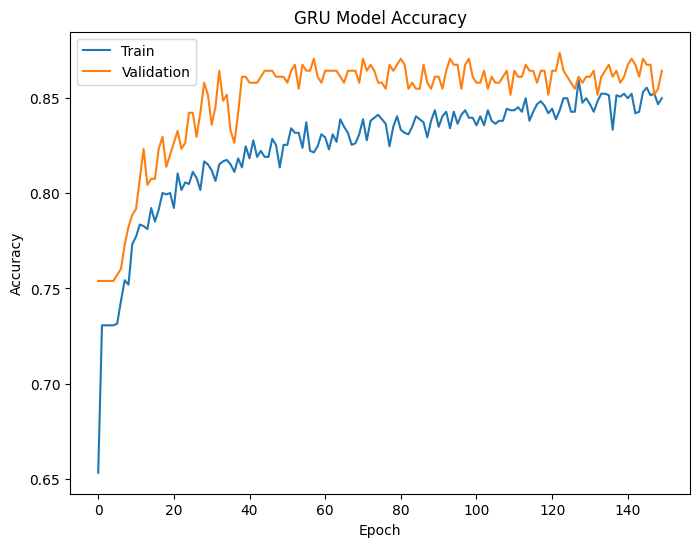

In [ ]:
### Plotting Training and Validation Metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')




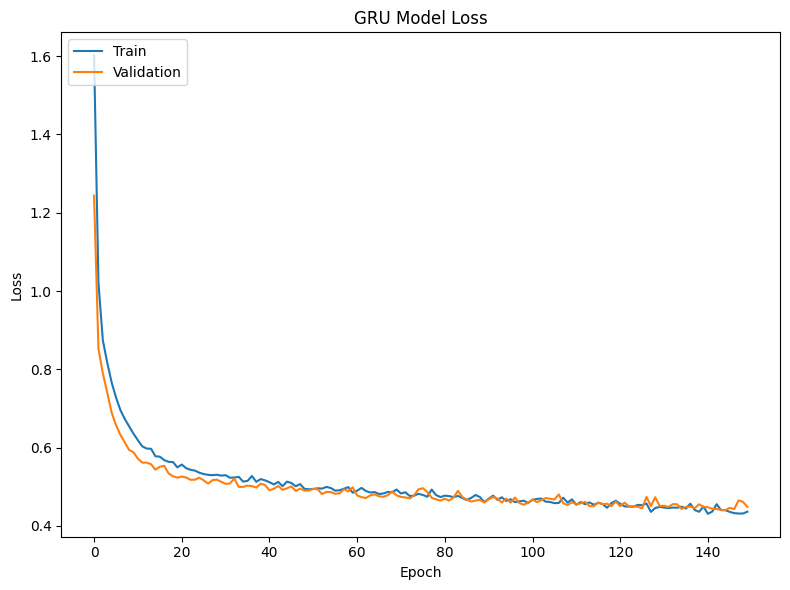

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

#### GRU Model Tuning

In [ ]:
# Define a GRU model for hyperparameter tuning
def build_gru_model(input_shape, units_1=64, units_2=32, dropout_1=0.3, dropout_2=0.2, learning_rate=0.001):
    model = Sequential()

    # First GRU layer
    model.add(GRU(units_1, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(dropout_1))

    # Second GRU layer
    model.add(GRU(units_2, activation='relu'))
    model.add(Dropout(dropout_2))

    # Output layer for classification (number of units should match the number of classes)
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Use softmax for multi-class classification

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Wrap the GRU model using scikeras
model = KerasClassifier(build_fn=build_gru_model, input_shape=(X_train.shape[1], X_train.shape[2]), verbose=0)

# Define the hyperparameter grid for Random Search
param_dist = {
    'units_1': [32, 64, 128],
    'units_2': [16, 32, 64],
    'dropout_1': [0.2, 0.3, 0.4],
    'dropout_2': [0.2, 0.3],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20, 30]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search_result = random_search.fit(X_train, y_train)

# Print the best hyperparameters found
print(f"Best Hyperparameters: {random_search_result.best_params_}")


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Get the best model from the search result
best_model = random_search_result.best_estimator_

# Train the best model on the training data
best_model.fit(X_train, y_train, epochs=random_search_result.best_params_['epochs'], batch_size=random_search_result.best_params_['batch_size'], validation_split= 0.2)

# Evaluate the best model
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


## XGBoost Training

[0]	validation_0-mlogloss:1.58040	validation_1-mlogloss:1.59837
[1]	validation_0-mlogloss:1.42955	validation_1-mlogloss:1.46337
[2]	validation_0-mlogloss:1.29622	validation_1-mlogloss:1.34592
[3]	validation_0-mlogloss:1.19127	validation_1-mlogloss:1.25544
[4]	validation_0-mlogloss:1.09278	validation_1-mlogloss:1.16974
[5]	validation_0-mlogloss:1.00808	validation_1-mlogloss:1.09761
[6]	validation_0-mlogloss:0.93239	validation_1-mlogloss:1.03156
[7]	validation_0-mlogloss:0.86774	validation_1-mlogloss:0.97597
[8]	validation_0-mlogloss:0.80958	validation_1-mlogloss:0.92838
[9]	validation_0-mlogloss:0.75916	validation_1-mlogloss:0.88697
[10]	validation_0-mlogloss:0.71195	validation_1-mlogloss:0.84709
[11]	validation_0-mlogloss:0.66894	validation_1-mlogloss:0.81129
[12]	validation_0-mlogloss:0.62917	validation_1-mlogloss:0.78041
[13]	validation_0-mlogloss:0.59580	validation_1-mlogloss:0.75142
[14]	validation_0-mlogloss:0.56388	validation_1-mlogloss:0.72654
[15]	validation_0-mlogloss:0.53507	

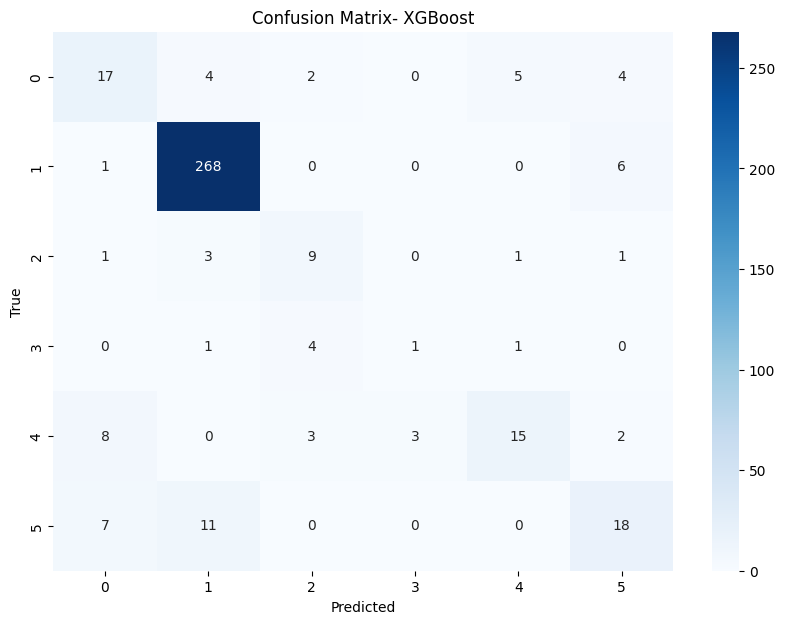

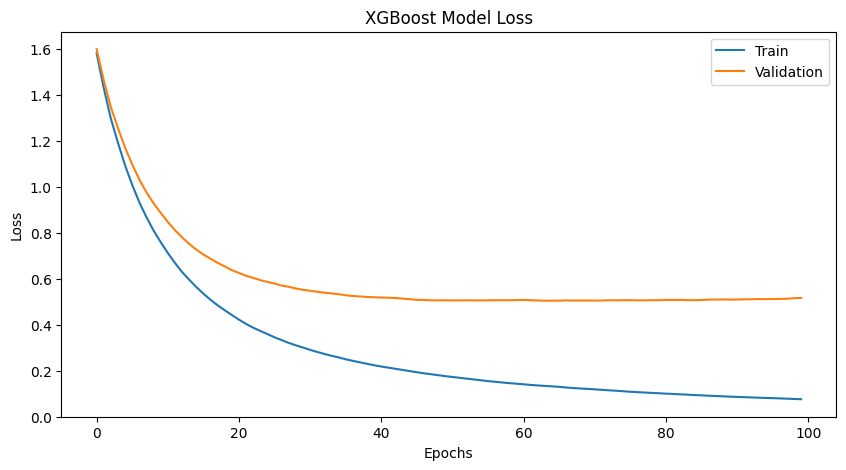

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Determine number of classes
num_classes = len(np.unique(y_train))

# Reshape input data for XGBoost (Flatten into 2D)
X_train_xgb = X_train.reshape((X_train.shape[0], -1))
X_test_xgb = X_test.reshape((X_test.shape[0], -1))

# XGBoost Model
def xgb_model(X_train, y_train, X_test, y_test, num_classes):
    model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes,
                              n_estimators=100, max_depth=5, learning_rate=0.1,
                              subsample=0.8, colsample_bytree=0.8, gamma=0.1,
                              eval_metric='mlogloss')
    model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=True)

    # Predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Model Test Accuracy:", accuracy)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix- XGBoost')
    plt.show()

    # Plot Training Accuracy and Loss
    results = model.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

    # Loss Plot
    plt.figure(figsize=(10, 5))
    plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('XGBoost Model Loss')
    plt.show()

    return model

# Build and train XGBoost model
xgboost_model = xgb_model(X_train_xgb, y_train, X_test_xgb, y_test, num_classes)


## Hybrid Model


### LSTM & XGBoost

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3320 - loss: 2.7039 - val_accuracy: 0.4242 - val_loss: 2.0137
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4574 - loss: 1.5987 - val_accuracy: 0.4646 - val_loss: 1.1707
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4629 - loss: 1.3048 - val_accuracy: 0.4747 - val_loss: 1.1119
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5222 - loss: 1.0973 - val_accuracy: 0.5354 - val_loss: 1.0839
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5320 - loss: 1.1254 - val_accuracy: 0.4747 - val_loss: 1.0350
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5199 - loss: 1.1242 - val_accuracy: 0.6061 - val_loss: 1.0035
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5983 - loss: 1.0315 - val_accuracy: 0.5278 - val_loss: 0.9857
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5742 - loss: 1.0318 - val_accuracy: 0.6035 - val_loss

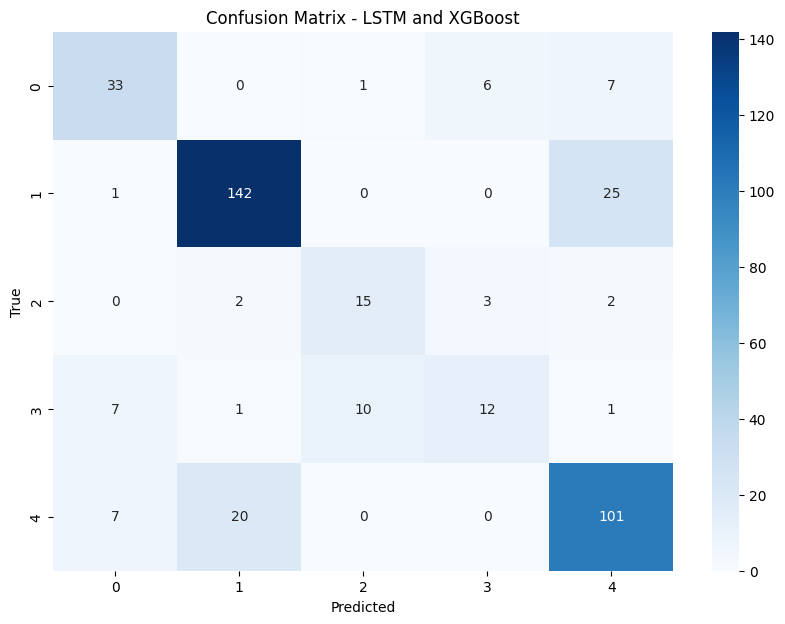

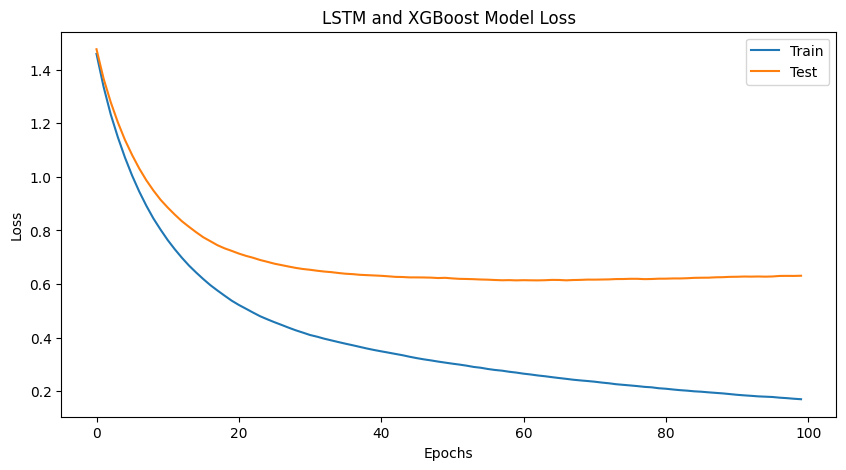

KeyError: 'merror'

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# LSTM Model as Feature Extractor
def build_lstm_feature_extractor(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.3))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))  # Dense layer for feature extraction
    return model

# Build the LSTM feature extractor model
lstm_feature_extractor = build_lstm_feature_extractor(input_shape=X_train.shape[1:])

# Compile the model (No softmax, since we're using it as a feature extractor)
lstm_feature_extractor.compile(optimizer=Adam(learning_rate=0.001),
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])

# Train the LSTM model (without the final classification layer)
history = lstm_feature_extractor.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Extract Features for XGBoost (from the penultimate layer)
extract_features = Sequential(lstm_feature_extractor.layers[:-1])  # Remove last Dense layer
X_train_features = extract_features.predict(X_train)
X_test_features = extract_features.predict(X_test)

# Determine number of classes
num_classes = len(np.unique(y_train))

# XGBoost Model
def xgb_model(X_train, y_train, X_test, y_test, num_classes):
    model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes,
                              n_estimators=100, max_depth=5, learning_rate=0.1,
                              subsample=0.8, colsample_bytree=0.8, gamma=0.1,
                              eval_metric='mlogloss')  # Set eval_metric here

    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train), (X_test, y_test)],
              verbose=True)

    # Predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("XGBoost Model Test Accuracy:", accuracy)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix - LSTM and XGBoost')
    plt.show()

    # Plot Training Accuracy and Loss for XGBoost
    results = model.evals_result()
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)

    # Loss Plot
    plt.figure(figsize=(10, 5))
    plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    plt.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('LSTM and XGBoost Model Loss')
    plt.show()


    return model

# Build and train XGBoost on extracted features
xgboost_model = xgb_model(X_train_features, y_train, X_test_features, y_test, num_classes)


### LSTM & BiLSTM

In [ ]:
# Define a hybrid LSTM-BiLSTM model
def build_lstm_bilstm_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First LSTM layer
    x = LSTM(64, activation='relu', return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # Second layer: BiLSTM to capture both past and future dependencies
    x = Bidirectional(LSTM(64, activation='relu', return_sequences=True))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Third LSTM layer to further process the output from BiLSTM
    x = LSTM(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # Output layer for classification (number of units should match the number of classes)
    outputs = Dense(len(np.unique(y_train)), activation='softmax')(x)  # Use softmax for multi-class classification

    # Create the model by specifying inputs and outputs
    model = Model(inputs=inputs, outputs=outputs)  # The Functional model is created with defined inputs and outputs.

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Get input shape from the training data
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)
num_classes = y_train.shape[0] # Number of classes #Modified Line

# Build the model
lstm_bilstm_model = build_lstm_bilstm_model(input_shape, num_classes) #Modified Line


# Display the model summary
lstm_bilstm_model.summary()

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 1, 12)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 1, 64)               │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 1, 128)              │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,582 (533.52 KB)

 Trainable params: 136,070 (531.52 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# Fit the model
history = lstm_bilstm_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split= 0.2,
    verbose=1
)

# Evaluate the model
loss, accuracy = lstm_bilstm_model.evaluate(X_test, y_test)
print(f"LSTM & BiLSTM Test Loss: {loss:.4f}")
print(f"LSTM & BiLSTM Test Accuracy: {accuracy:.4f}")

Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 80ms/step - accuracy: 0.3362 - loss: 2.0831 - val_accuracy: 0.7539 - val_loss: 1.5076
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.6789 - loss: 1.2071 - val_accuracy: 0.7539 - val_loss: 1.2460
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7434 - loss: 0.9104 - val_accuracy: 0.7539 - val_loss: 1.0567
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7671 - loss: 0.8252 - val_accuracy: 0.7539 - val_loss: 0.9639
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7763 - loss: 0.8163 - val_accuracy: 0.7539 - val_loss: 0.9340
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7789 - loss: 0.8338 - val_accuracy: 0.7539 - val_loss: 0.9313
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7952 - loss: 0.6827 - val_accuracy: 0.7539 - val_loss: 0.9362
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7910 - loss: 0.7112 - val_accuracy: 0

In [ ]:
# Make predictions
y_pred_lstm_bilstm = lstm_bilstm_model.predict(X_test)
y_pred_class_lstm_bilstm = np.argmax(y_pred_lstm_bilstm, axis=1)  # Convert predictions to class indices

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


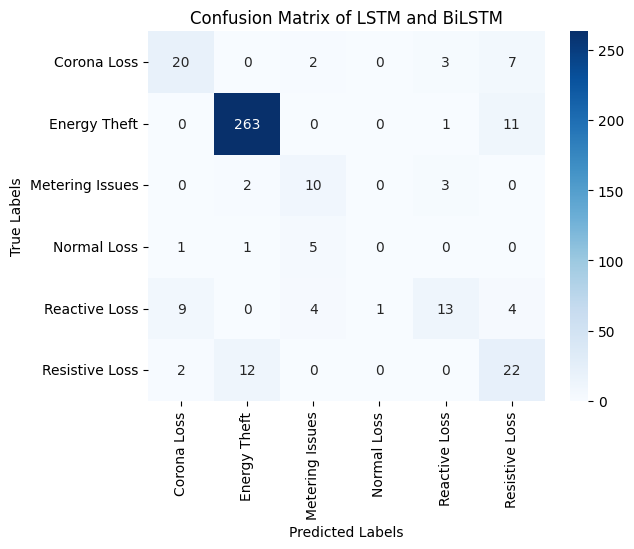

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        32
           1       0.95      0.96      0.95       275
           2       0.48      0.67      0.56        15
           3       0.00      0.00      0.00         7
           4       0.65      0.42      0.51        31
           5       0.50      0.61      0.55        36

    accuracy                           0.83       396
   macro avg       0.53      0.55      0.53       396
weighted avg       0.82      0.83      0.82       396



In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class_lstm_bilstm) # Calculate and assign to conf_matrix

# Get class names from label encoder
class_names = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of LSTM and BiLSTM")
plt.show()

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_class_lstm_bilstm))

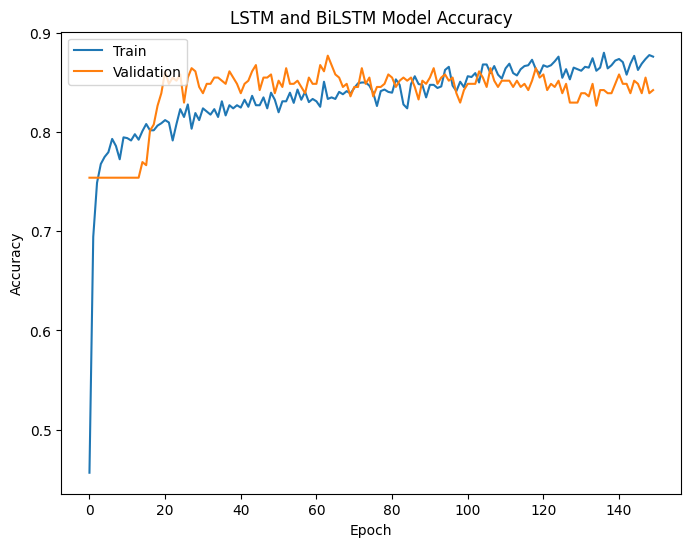

In [ ]:
### Plotting Training and Validation Metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM and BiLSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


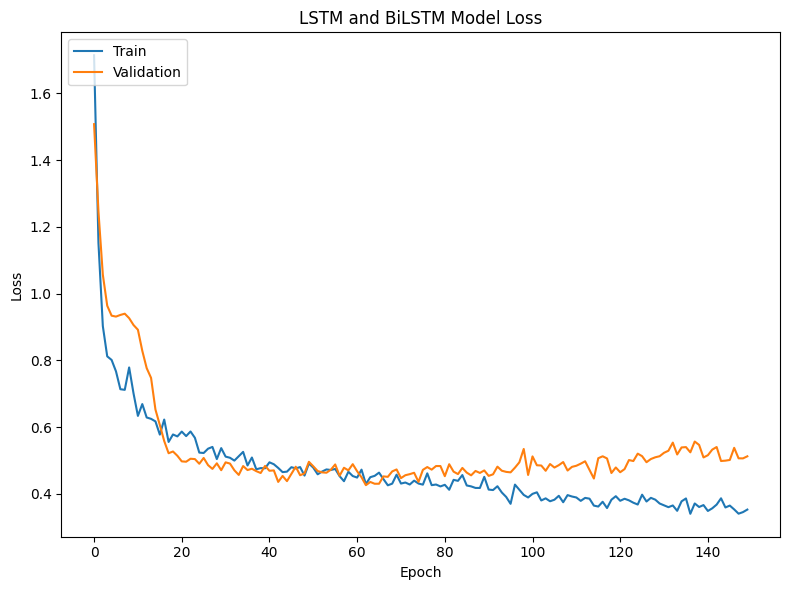

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM and BiLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### LSTM & GRU

In [ ]:
# Define a hybrid LSTM and GRU model
def build_lstm_gru_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # First LSTM layer
    x = LSTM(64, activation='relu', return_sequences=True)(inputs)
    x = Dropout(0.5)(x)

    # GRU layer following the LSTM layer
    x = GRU(64, activation='relu', return_sequences=True)(x)
    x = Dropout(0.3)(x)

    # Another LSTM layer to further refine the sequence
    x = LSTM(32, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Output layer (number of units should equal number of classes in the target)
    outputs = Dense(num_classes, activation='softmax')(x)

    # Compile the model
    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model


# Get input shape from the training data
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, num_features)
num_classes = y_train.shape[0] # Number of classes #Modified Line

# Build the model
lstm_gru_model = build_lstm_gru_model(input_shape, num_classes) #Modified Line

# Display the model summary
lstm_gru_model.summary()


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 1, 12)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 1, 64)               │          19,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 1, 64)               │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1583)                │          52,239 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,327 (427.06 KB)

 Trainable params: 109,327 (427.06 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fit the model
history = lstm_gru_model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=32,
    validation_split= 0.2,
    verbose=1
)


Epoch 1/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 60s 28ms/step - accuracy: 0.5811 - loss: 7.3417 - val_accuracy: 0.7539 - val_loss: 7.1722
Epoch 2/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7307 - loss: 6.3968 - val_accuracy: 0.7539 - val_loss: 0.9791
Epoch 3/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7421 - loss: 0.9805 - val_accuracy: 0.7539 - val_loss: 0.8488
Epoch 4/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7351 - loss: 0.9634 - val_accuracy: 0.7539 - val_loss: 0.8196
Epoch 5/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7279 - loss: 0.9092 - val_accuracy: 0.7539 - val_loss: 0.8096
Epoch 6/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7367 - loss: 0.9178 - val_accuracy: 0.7539 - val_loss: 0.7870
Epoch 7/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7367 - loss: 0.8825 - val_accuracy: 0.7539 - val_loss: 0.7784
Epoch 8/150
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7473 - loss: 0.8481 - val_accuracy: 0

In [ ]:
# Evaluate the model
loss, accuracy = lstm_gru_model.evaluate(X_test, y_test)
print(f"LSTM and GRU Test Loss: {loss:.4f}")
print(f"LSTM and GRU Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8354 - loss: 0.4631
LSTM and GRU Test Loss: 0.5121
LSTM and GRU Test Accuracy: 0.8283


In [ ]:
# Make predictions
y_pred_lstm_gru = lstm_gru_model.predict(X_test)
y_pred_class_lstm_gru = np.argmax(y_pred_lstm_gru, axis=1)  # Convert predictions to class indices

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


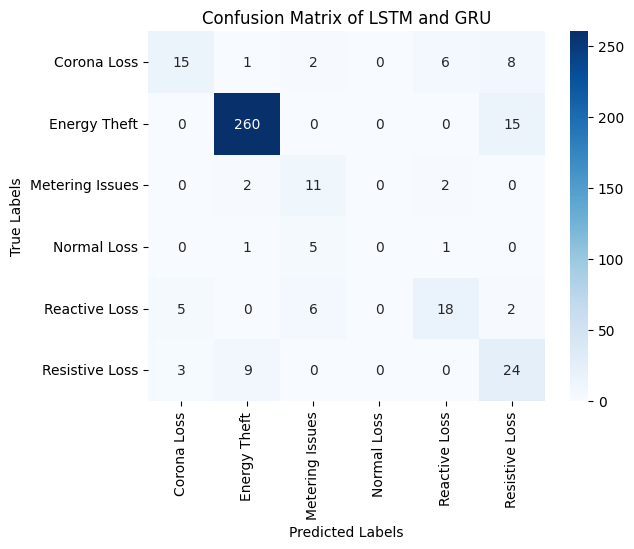

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.47      0.55        32
           1       0.95      0.95      0.95       275
           2       0.46      0.73      0.56        15
           3       0.00      0.00      0.00         7
           4       0.67      0.58      0.62        31
           5       0.49      0.67      0.56        36

    accuracy                           0.83       396
   macro avg       0.54      0.57      0.54       396
weighted avg       0.83      0.83      0.82       396



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_class_lstm_gru) # Calculate and assign to conf_matrix

# Get class names from label encoder
class_names = label_encoder.classes_

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix of LSTM and GRU")
plt.show()

# Print the classification report and accuracy
print("Classification Report:")
print(classification_report(y_test, y_pred_class_lstm_gru))

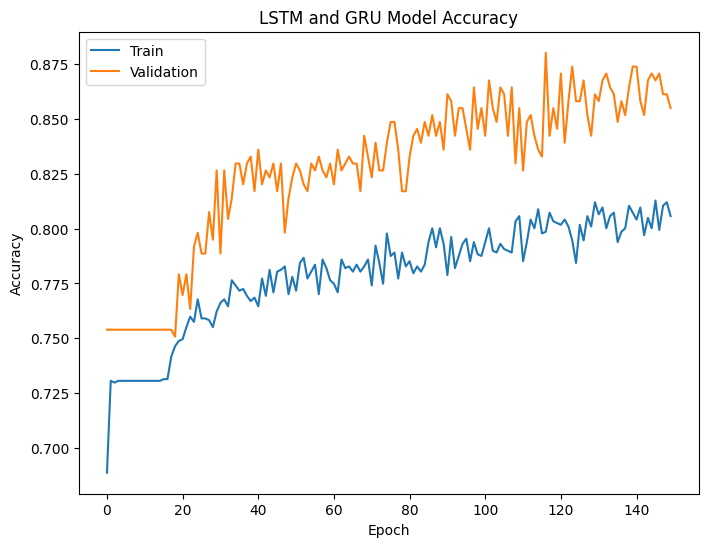

In [ ]:
### Plotting Training and Validation Metrics
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM and GRU Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')



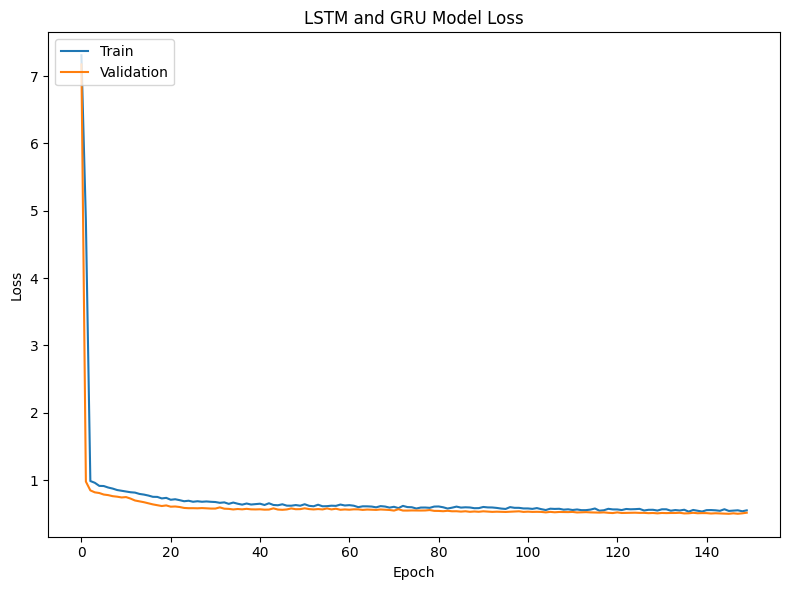

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM and GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


#Revenue Optimization with Particle Swarm Optimization (PSO)

The Particle Swarm Optimization (PSO) minimizes the total loss (totalloss) by optimizing the feature values for each row in the dataset. The features are first normalized to a common scale using MinMaxScaler, and the PSO algorithm is run for each row in the dataset to find the best combination of feature values that minimize the total loss. The optimized results are then denormalized and stored in a DataFrame for further analysis.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pyswarm import pso

# Define features and target
features = ['africanfoundrieslimited', 'kamsteel', 'pheonix', 'quantum', 'starpipe', 'sunflag', 'topsteel']
target = 'totalloss'

# Normalize the features
scaler = MinMaxScaler()
data_normalized = data.copy()
data_normalized[features] = scaler.fit_transform(data[features])

In [ ]:
# Set boundaries for PSO in the normalized range [0, 1]
lb = np.zeros(len(features))
ub = np.ones(len(features))

# Prepare an empty list to store optimized results
optimized_results = []

# Define the fitness function for a single row
def fitness_function(normalized_feature_values, row_data):
    # Denormalize the feature values for calculation (so the model can work in the original scale)
    feature_values_original_scale = scaler.inverse_transform([normalized_feature_values])

    # Calculate 'totalloss' based on denormalized feature values
    totalloss_pred = sum(feature_values_original_scale[0])
    return totalloss_pred

In [ ]:
# Run PSO for each row in the dataset
for index, row in data_normalized.iterrows():
    # Wrap the fitness function to include row data
    fitness_fn = lambda normalized_feature_values: fitness_function(normalized_feature_values, row)

    # Run PSO to minimize 'totalloss' for this row
    best_position, best_score = pso(fitness_fn, lb, ub, swarmsize=30, maxiter=100)# pBest and gBest

    # Denormalize the optimized feature values
    best_position_original_scale = scaler.inverse_transform([best_position])[0]

    # Store the optimized values and minimized 'totalloss' in a dictionary for this row
    optimized_result = {
        'Index': index,
        'Best_Feature_Values': best_position_original_scale,
        'Minimized_totalloss': best_score
    }
    optimized_results.append(optimized_result)

# Convert results to DataFrame for analysis
optimized_df = pd.DataFrame(optimized_results)
print(optimized_df)


Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best position change less than 1e-08
Stopping search: Swarm best objective change less than 1e-08
Stopping search: maximum iterations reached --> 100
Stopping search: maximum iterations reached --> 100
Stopping search: Swarm best position change less than 1e-08
Stopping search: maximum itera

In [ ]:
minimized_loss = optimized_df.iloc[:, 2]
print(minimized_loss)

0       1.111179
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1975    0.754267
1976    0.000000
1977    0.000000
1978    0.513469
1979    0.000000
Name: Minimized_totalloss, Length: 1980, dtype: float64


In [ ]:
# Extract the 'Date' and 'TotalLoss' columns from the DataFrame
date_and_totalloss = data[['date', 'totalloss']]

In [ ]:
# Merge the two DataFrames/Series
merged_df = date_and_totalloss.copy()  # Copy to keep the original DataFrame unchanged
merged_df['minimized_loss'] = minimized_loss.values  # Add the Series as a new column
merged_df.head()

,date,totalloss,minimized_loss
0,2024-07-01 00:00:00,21.530000,1.111179
1,2024-07-01 01:00:00,20.110000,0.000000
2,2024-07-01 02:00:00,22.614870,0.000000
3,2024-07-01 03:00:00,23.648091,0.000000
4,2024-07-01 04:00:00,23.521320,0.000000


In [ ]:

# Convert the DataFrame to CSV
#csv_data = merged_df.to_csv(index=False)
#merged_df.to_csv('finaldoc.csv', index=False)

## Plot Actual loss vs Minimized loss

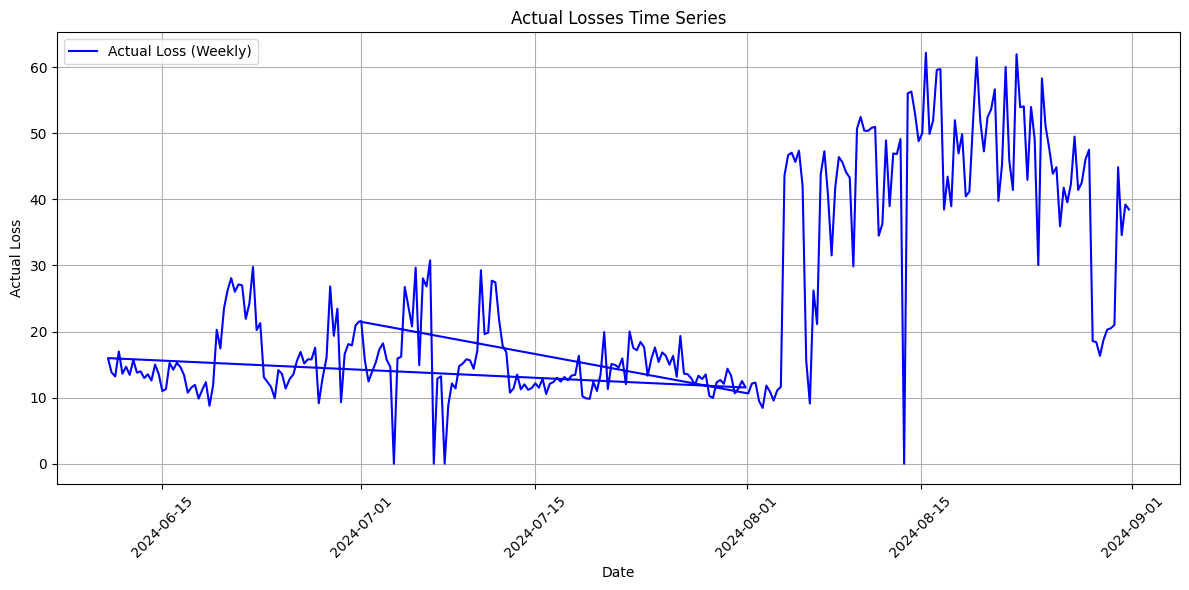

In [ ]:
# Plot only every nth data point to reduce clutter (e.g., every 7th day)
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'][::7], merged_df['totalloss'][::7], label='Actual Loss (Weekly)', color='blue')
plt.xlabel('Date')
plt.ylabel('Actual Loss')
plt.title('Actual Losses Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


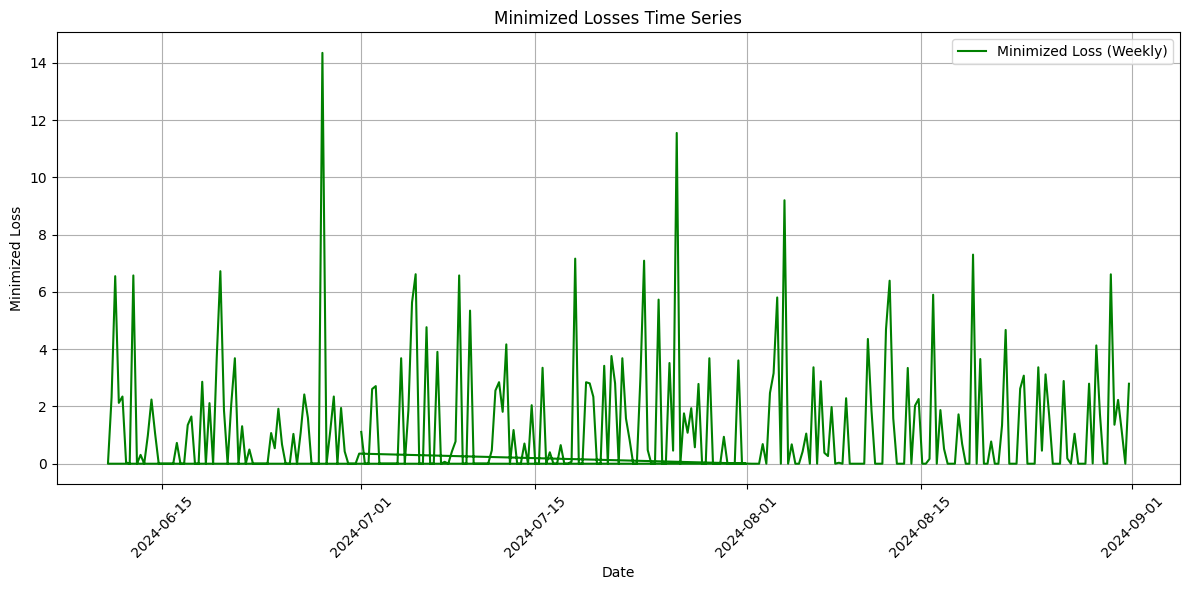

In [ ]:
# Plot only every nth data point to reduce clutter (e.g., every 7th day)
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'][::7], merged_df['minimized_loss'][::7], label='Minimized Loss (Weekly)', color='green')
plt.xlabel('Date')
plt.ylabel('Minimized Loss')
plt.title('Minimized Losses Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


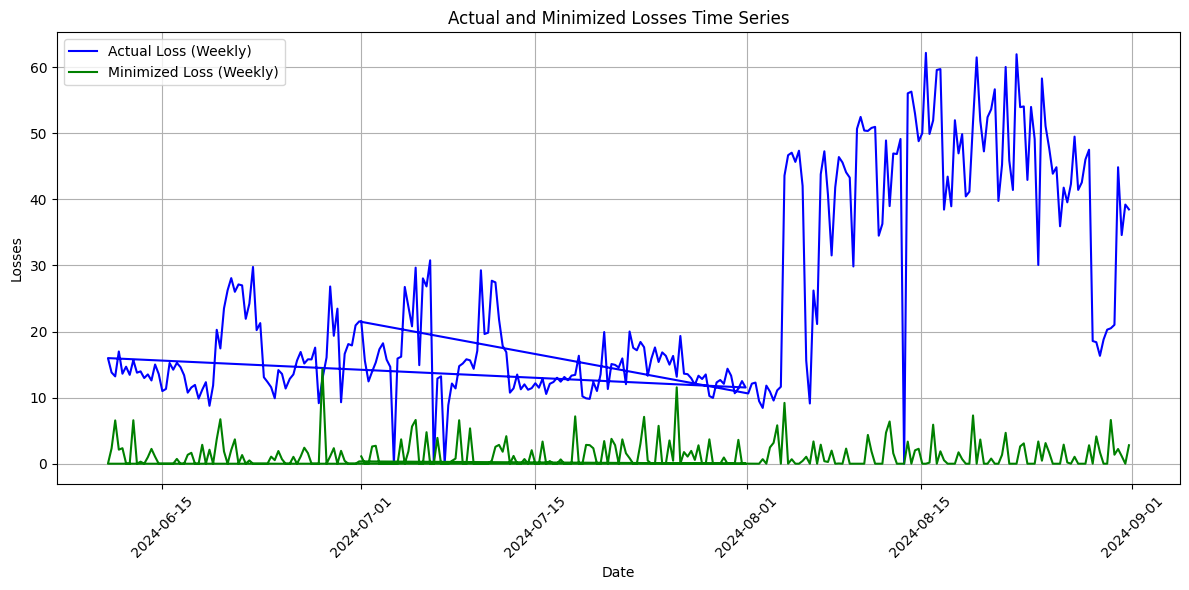

In [ ]:
## Merge both Actual Loss and Minimized loss
plt.figure(figsize=(12, 6))
plt.plot(merged_df['date'][::7], merged_df['totalloss'][::7], label='Actual Loss (Weekly)', color='blue')
plt.plot(merged_df['date'][::7], merged_df['minimized_loss'][::7], label='Minimized Loss (Weekly)', color='green')
plt.xlabel('Date')
plt.ylabel('Losses')
plt.title('Actual and Minimized Losses Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Calculate the Energy Saved

The current Electricty rate in Nigeria is ₦22.30 kW/hr

In [ ]:
# Check the difference between TotalLoss and MinimizedLoss
merged_df['LossDifference_MW'] = merged_df['totalloss'] - merged_df['minimized_loss']


In [ ]:
# Converts LossDifference to kW
merged_df['LossDifference_kW'] = merged_df['LossDifference_MW'] * 1000

# Calculate Energy Saved in Naira and format with the Naira symbol
merged_df['Energy_Saved (₦)'] = merged_df['LossDifference_kW'] * 22.30
#merged_df['Energy_Saved'] = merged_df['Energy_Saved'].apply(lambda x: f"₦{x:,.2f}")

# Display the DataFrame to confirm the new column
merged_df.head()


,date,totalloss,minimized_loss,LossDifference_MW,LossDifference_kW,Energy_Saved (₦)
0,2024-07-01 00:00:00,21.530000,1.111179,20.418821,20418.821421,455339.717690
1,2024-07-01 01:00:00,20.110000,0.000000,20.110000,20110.000000,448453.000000
2,2024-07-01 02:00:00,22.614870,0.000000,22.614870,22614.869684,504311.593964
3,2024-07-01 03:00:00,23.648091,0.000000,23.648091,23648.090659,527352.421703
4,2024-07-01 04:00:00,23.521320,0.000000,23.521320,23521.320495,524525.447043


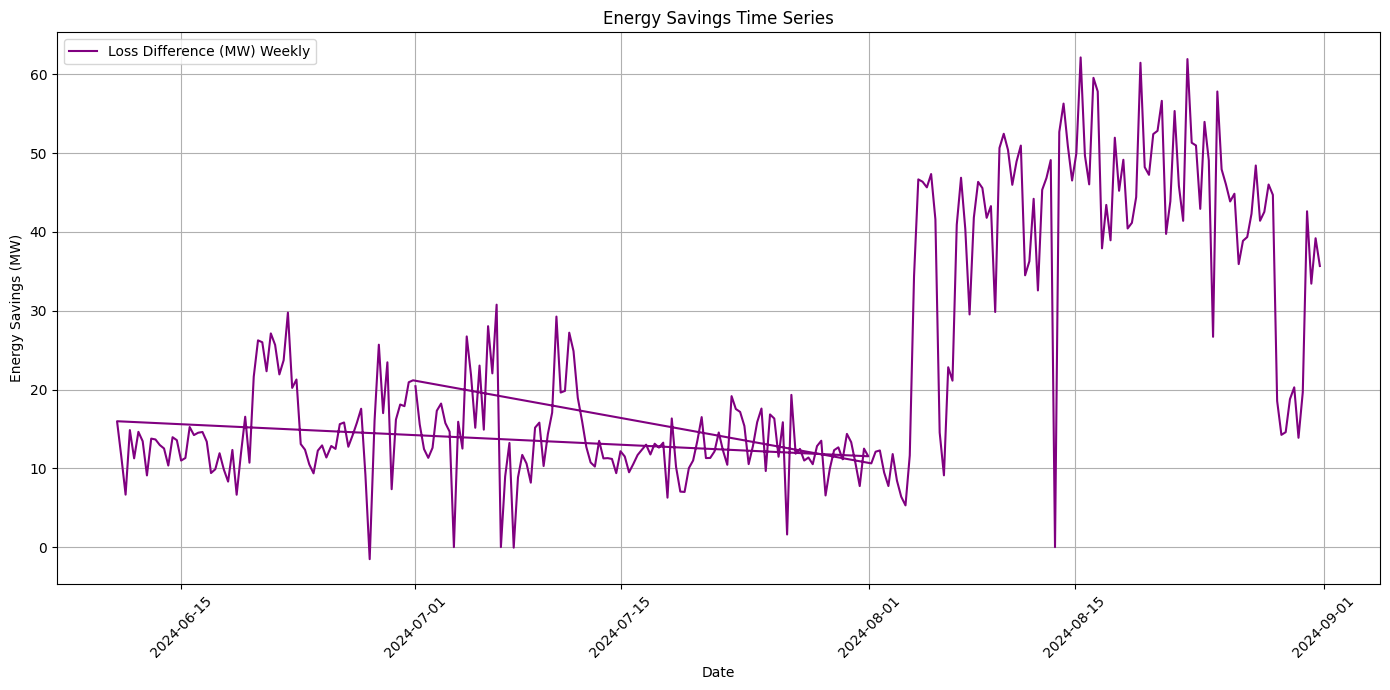

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(merged_df['date'][::7], merged_df['LossDifference_MW'][::7], label='Loss Difference (MW) Weekly', color='purple')
plt.xlabel('Date')
plt.ylabel('Energy Savings (MW)')
plt.title('Energy Savings Time Series')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


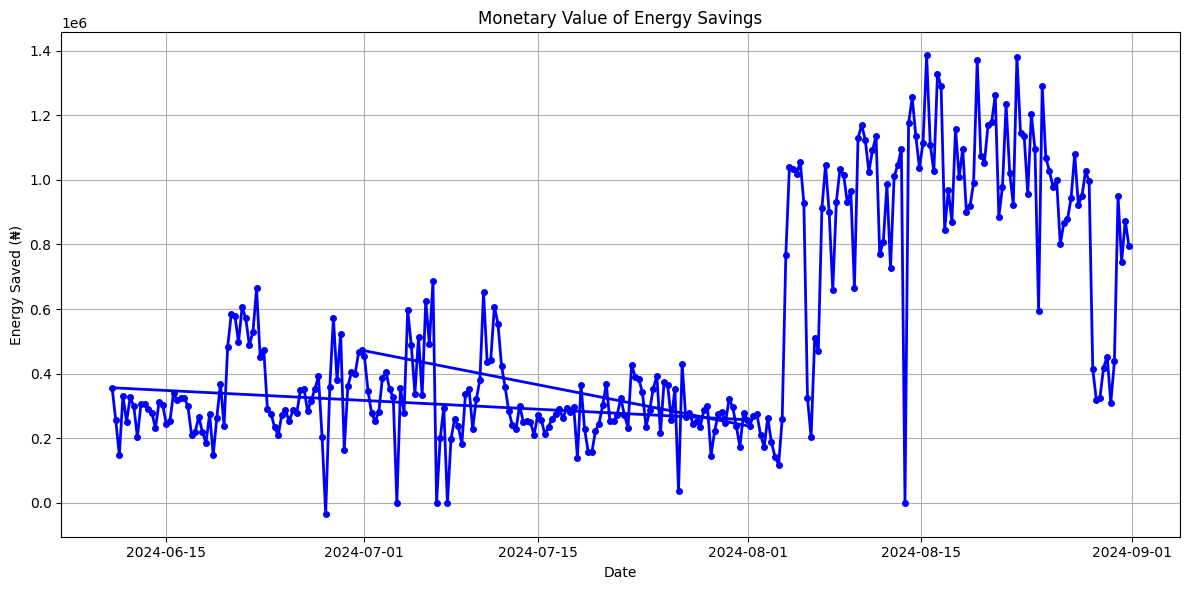

In [ ]:
# Plotting the energy saved data
plt.figure(figsize=(12, 6))
#plt.plot(energy_saved, marker='o', color='blue', linewidth=2, markersize=4)
plt.plot(merged_df['date'][::7],merged_df['Energy_Saved (₦)'][::7], label='Loss Difference (MW) Weekly', marker='o', color='blue', linewidth=2, markersize=4)
# Adding labels and title
plt.xlabel('Date', fontsize=10)
plt.ylabel('Energy Saved (₦)', fontsize=10)
plt.title('Monetary Value of Energy Savings')

# Enhancing the plot for better clarity
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
merged_df.to_excel('finaldoc.xlsx', index=False)

# Model Deployment with Gradio

In [ ]:
# LSTM trained model
best_model.save("lstm_model.h5")

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from pyswarm import pso

# Load the trained LSTM model
model = load_model("lstm_model.h5")

# Define feature column names
feature_names = [
    "africanfoundrieslimited", "ikorodu1", "ikorodu2", "kamsteel", "paras", "pheonix",
    "quantum", "starpipe", "sunflag", "taopex", "topsteel", "odogunyan"
]

# Define the class mapping (from the encoder categories used during training)
class_mapping = list(label_encoder.classes_)  # Use label_encoder instead of encoder
#class_mapping = list(encoder.categories_[0])  # Ensure encoder is the same used during preprocessing

# Prediction function for a single input
def predict_loss_single(line_losses):
    try:
        # Reshape the input to match the model's expected shape
        input_data = np.array(line_losses, dtype=np.float32).reshape(1, 1, -1)

        # Predict using the model
        predictions = model.predict(input_data)
        predicted_class_index = np.argmax(predictions)

        # Map the predicted class index to the corresponding label
        predicted_class = class_mapping[predicted_class_index]
        confidence = predictions[0][predicted_class_index]

        return predicted_class, confidence
    except Exception as e:
        return f"Error: {str(e)}"

# Function to compute the sum of line losses (objective function for PSO)
def objective_function(line_losses):
    return sum(line_losses)  # Minimize the sum of the provided line losses

# Particle Swarm Optimization (PSO) implementation
def optimize_line_losses(user_input_losses):
    # Define bounds for the optimization based on user input
    lower_bounds = [0] * len(user_input_losses)
    upper_bounds = [max(loss, 0.1) for loss in user_input_losses]  # Ensure upper bounds are valid

    # Objective function wrapper for PSO
    def obj_fn(x):
        return objective_function(x)

    # Run PSO with valid bounds
    optimal_losses, _ = pso(obj_fn, lower_bounds, upper_bounds, swarmsize=10, maxiter=15)
    return optimal_losses


# Gradio prediction function
def predict_loss(*line_losses):
    try:
        # Step 1: Predict the class and confidence for given losses
        predicted_class, confidence = predict_loss_single(line_losses)

        # Step 2: Return results
        return (
            f"Input Line Losses: {line_losses}\n"
            f"Predicted Loss Type: {predicted_class}\n"
            f"Confidence: {confidence:.2%}"
        )
    except Exception as e:
        return f"Error: {str(e)}"

def optimize_and_predict_loss(*line_losses):
    try:
        # Step 1: Optimize line losses based on user inputs
        optimal_losses = optimize_line_losses(line_losses)

        # Step 2: Predict the class and confidence for optimized losses
        predicted_class, confidence = predict_loss_single(optimal_losses)

        # Step 3: Return results
        return (
            f"Input Line Losses: {line_losses}\n"
            f"Optimal Line Losses: {optimal_losses}\n"
            f"Predicted Loss Type: {predicted_class}\n"
            f"Confidence: {confidence:.2%}\n"
            f"Sum of Optimal Losses: {sum(optimal_losses):.2f} MW"
        )
    except Exception as e:
        return f"Error: {str(e)}"

def calculate_difference(*line_losses):
    try:
        # Step 1: Calculate the sum of input line losses
        actual_sum = sum(line_losses)

        # Step 2: Optimize line losses based on user inputs
        optimal_losses = optimize_line_losses(line_losses)
        optimal_sum = sum(optimal_losses)

        # Step 3: Calculate the difference
        difference = actual_sum - optimal_sum

        return (
            f"Sum of Actual Losses: {actual_sum:.2f} MW\n"
            f"Sum of Optimal Losses: {optimal_sum:.2f} MW\n"
            f"Difference: {difference:.2f} MW"
        )
    except Exception as e:
        return f"Error: {str(e)}"

def calculate_energy_saved(*line_losses):
    try:
        # Step 1: Optimize line losses based on user inputs
        optimal_losses = optimize_line_losses(line_losses)
        optimal_sum = sum(optimal_losses)

        # Step 2: Calculate the sum of input line losses
        actual_sum = sum(line_losses)

        # Step 3: Calculate the energy saved in kW and cost in Naira
        energy_saved_kw = (actual_sum - optimal_sum) * 1000
        cost_saved_naira = energy_saved_kw * 22.3

        return (
            f"Energy Saved: {energy_saved_kw:.2f} kW\n"
            f"Cost Saved: {cost_saved_naira:.2f} Naira"
        )
    except Exception as e:
        return f"Error: {str(e)}"

# Create Gradio app
with gr.Blocks() as demo:
    gr.Markdown("## Transmission Line Loss Classifier and Optimizer")
    gr.Markdown("Input the line losses (in MW) for each of the following categories:")

    # Input fields for all line loss values
    inputs = [gr.Number(label=name, value=0.0, precision=2) for name in feature_names]

    # Output displays
    prediction_output = gr.Textbox(label="Prediction Result")
    optimization_output = gr.Textbox(label="Optimization Result")
    difference_output = gr.Textbox(label="Difference Result")
    energy_saved_output = gr.Textbox(label="Energy Saved Result")

    # Buttons for prediction, optimization, difference, and energy savings
    gr.Button("Predict").click(predict_loss, inputs=inputs, outputs=prediction_output)
    gr.Button("Optimize and Predict").click(optimize_and_predict_loss, inputs=inputs, outputs=optimization_output)
    gr.Button("Check Difference").click(calculate_difference, inputs=inputs, outputs=difference_output)
    gr.Button("Calculate Energy Saved").click(calculate_energy_saved, inputs=inputs, outputs=energy_saved_output)

# Launch the Gradio app
if __name__ == "__main__":
    demo.launch(debug=True)


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://7b77a8d3b04940cbaa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://7b77a8d3b04940cbaa.gradio.live
